#Technical Assessment – Analyst, Data Science – 167

The below task involves analyzing data for a supervisory manager to help allocate scarce resources by determining which firms require more attention. Here's the breakdown of the task based on the provided document:

**Key Metrics for Analysis**

The supervisory resource allocation should focus on the following characteristics:

1.   **Firm Size**: Larger firms need more attention because the generally have a bigger impact on the market and may carry more risk because they handle larger volumes of business.
2.   **Changing Business Profile**: Firms with significant year-on-year data changes. If a company’s financial data is changing a lot year-over-year (for example, if their GWP or claims are fluctuating), it may indicate instability or growth, which requires closer monitoring.
1.    **Outliers from the Norm**: Firms that deviate significantly from the average in a single reporting period. An outlier is a data point that is significantly different from others. In this context, it could mean a company whose metrics (like profitability or claims) are very unusual compared to the rest. Outliers may either signal potential problems (like reporting errors) or unique characteristics that require extra attention.

**Provided Metrics:**

The data includes typical insurance-related metrics, such as:


1.   Gross Written Premium (GWP):

*   **Definition**: This is the total revenue that an insurance company earns from
writing (selling) insurance policies. It represents the company's "turnover" from its core business.
*  **Why It's Important**: A higher GWP usually indicates a larger company, as it shows how much business they're doing by selling policies.
2.    Net Written Premium (NWP):
* **Definition**: This is the Gross Written Premium (GWP) minus any reinsurance
costs. Reinsurance is when an insurance company buys insurance from another company to reduce its risk.
*  **Why It's Important**: NWP shows how much risk the company is keeping for itself, compared to how much it's passing on to reinsurers. If a company is keeping more risk, it may need closer supervision.
3.  SCR Coverage Ratio:
*   **Definition**: This measures whether a firm has enough capital to cover its risks. The ratio is expressed as a percentage, with anything above 100% meaning the company has enough capital to meet the required standards.
*  **Why It's Important**:If a company's SCR ratio is below 100%, it doesn't have enough capital to cover potential losses, which might indicate higher financial risk.
4.     Gross Claims Incurred:
*   **Definition**: These are the total claims (insurance payouts) that an insurance company is liable to pay. It reflects the costs that the company incurs from insured events (like accidents or natural disasters).
*  **Why It's Important**:Monitoring how claims change over time helps assess the financial health of a firm. A sudden increase in claims can signal financial trouble.
5.    Net Combined Ratio:
*   **Definition**:This is a profitability ratio calculated as (Incurred Losses + Expenses) divided by Earned Premiums. A combined ratio below 100% means the company is making a profit, while a ratio above 100% indicates a loss.
*  **Why It's Important**:It’s a key indicator of how profitable or unprofitable a company is. A company with a combined ratio above 100% might need more attention because it's not making enough profit to cover its costs.

**Why These Metrics Matter for Supervision:**



1.   Financial Health: Metrics like the SCR coverage ratio and Net Combined Ratio help assess if a company is financially stable or at risk.
2.   Risk Exposure: GWP and NWP show how much business a company is handling and how much risk it’s retaining versus passing off to other companies (through reinsurance).
1.   Profitability: The Net Combined Ratio directly tells you if a company is operating profitably.
2.    
    Claims: Gross Claims Incurred shows the company's obligations and how these affect their financial situation over time.



**Dataset Overview**

**Dataset 1 - General:**

The first dataset ("Dataset 1 - General") provides financial data over multiple years (2016YE to 2020YE) for various firms. The columns represent different financial metrics such as:


1.   NWP (£m): Net Written Premium for different years.
2.   SCR (£m): Solvency Capital Requirement for different years.
1.   Total liabilities (£m): Total liabilities of firms across years.
2.   Excess of assets over liabilities (£m): This is the firm's equity, calculated as the difference between assets and liabilities.

Other columns likely represent additional financial ratios and metrics like expenses and liabilities.

**Dataset 2 - Underwriting:**

The second dataset ("Dataset 2 - Underwriting") contains information about each firm’s underwriting performance, including:


1.  Gross BEL (Best Estimate Liabilities): This may refer to the firm's estimate of its future obligations or liabilities.
2.  Gross Expense Ratio: A measure of how much it costs the firm to run its business relative to the premiums earned.
2.  Gross Combined Ratio: This measures the profitability of the firm by comparing the firm’s costs (losses and expenses) to its premiums. If this ratio is less than 100%, it indicates profitability.

The data covers multiple years, which allows for year-on-year comparisons to track changes and trends.
   



In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from scipy import stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
%matplotlib inline
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Loading 'Dataset 1 - General'
df_general = pd.read_excel("/content/Data for technical assessment.xlsx", sheet_name='Dataset 1 - General')
# Loading 'Dataset 2 - Underwriting'
df_underwriting = pd.read_excel("/content/Data for technical assessment.xlsx", sheet_name='Dataset 2 - Underwriting')


In [ ]:
# Rename columns for Dataset 1 - General
df_general.columns = ['Firm', 'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
                      'SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020',
                      'EoF_for_SCR_2016', 'EoF_for_SCR_2017', 'EoF_for_SCR_2018', 'EoF_for_SCR_2019', 'EoF_for_SCR_2020',
                      'SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018', 'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020',
                      'GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020',
                      'Total_Assets_2016', 'Total_Assets_2017', 'Total_Assets_2018', 'Total_Assets_2019', 'Total_Assets_2020',
                      'Total_Liabilities_2016', 'Total_Liabilities_2017', 'Total_Liabilities_2018', 'Total_Liabilities_2019', 'Total_Liabilities_2020',
                      'Equity_2016', 'Equity_2017', 'Equity_2018', 'Equity_2019', 'Equity_2020']

# # Rename columns for Dataset 2 - Underwriting
df_underwriting.columns = [
    'Firm',
    'Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020',
    'Gross_BEL_2016', 'Gross_BEL_2017', 'Gross_BEL_2018', 'Gross_BEL_2019', 'Gross_BEL_2020',
    'Net_BEL_2016', 'Net_BEL_2017', 'Net_BEL_2018', 'Net_BEL_2019', 'Net_BEL_2020',
    'Pure_net_claims_ratio_2016', 'Pure_net_claims_ratio_2017', 'Pure_net_claims_ratio_2018', 'Pure_net_claims_ratio_2019', 'Pure_net_claims_ratio_2020',
    'Net_expense_ratio_2016', 'Net_expense_ratio_2017', 'Net_expense_ratio_2018', 'Net_expense_ratio_2019', 'Net_expense_ratio_2020',
    'Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018', 'Net_combined_ratio_2019', 'Net_combined_ratio_2020',
    'Pure_gross_claims_ratio_2016', 'Pure_gross_claims_ratio_2017', 'Pure_gross_claims_ratio_2018', 'Pure_gross_claims_ratio_2019', 'Pure_gross_claims_ratio_2020',
    'Gross_expense_ratio_2016', 'Gross_expense_ratio_2017', 'Gross_expense_ratio_2018', 'Gross_expense_ratio_2019', 'Gross_expense_ratio_2020',
    'Gross_combined_ratio_2016', 'Gross_combined_ratio_2017', 'Gross_combined_ratio_2018', 'Gross_combined_ratio_2019', 'Gross_combined_ratio_2020'
]

# Checking the renamed columns
print(df_general.columns)
print(df_underwriting.columns)

#Checking for null values
print(df_general.isna().sum())
print(df_underwriting.isna().sum())


Index(['Firm', 'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
       'SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020',
       'EoF_for_SCR_2016', 'EoF_for_SCR_2017', 'EoF_for_SCR_2018',
       'EoF_for_SCR_2019', 'EoF_for_SCR_2020', 'SCR_Coverage_Ratio_2016',
       'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018',
       'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020', 'GWP_2016',
       'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020', 'Total_Assets_2016',
       'Total_Assets_2017', 'Total_Assets_2018', 'Total_Assets_2019',
       'Total_Assets_2020', 'Total_Liabilities_2016', 'Total_Liabilities_2017',
       'Total_Liabilities_2018', 'Total_Liabilities_2019',
       'Total_Liabilities_2020', 'Equity_2016', 'Equity_2017', 'Equity_2018',
       'Equity_2019', 'Equity_2020'],
      dtype='object')
Index(['Firm', 'Gross_claims_incurred_2016', 'Gross_claims_incurred_2017',
       'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019',
       'Gross_clai

In [ ]:
# Merge the general and underwriting datasets based on the 'Firm' column
df_merged = pd.merge(df_general, df_underwriting, on='Firm', how='outer')

# #Dropping unwanted rows
df_merged = df_merged.drop(0).reset_index(drop=True)

# Check the structure of the merged dataframe
df_merged.head()


Firm      NWP_2016      NWP_2017      NWP_2018      NWP_2019  \
0  Firm 1 -13779.815629             0             0             0   
1  Firm 2     28.178059     26.865049     25.064438     23.226445   
2  Firm 3             0     75.609681     70.578732     78.432782   
3  Firm 4  22344.199923  23963.910709  25760.390158  25512.748836   
4  Firm 5     68.200993     51.663132     44.010833     42.008556   

       NWP_2020     SCR_2016    SCR_2017    SCR_2018     SCR_2019  ...  \
0             0  1085.360139         0.0           0            0  ...   
1     21.718558    10.190314   10.113572    9.495235     8.146471  ...   
2      85.73583   322.955115  363.782327  362.290859   394.295982  ...   
3  24996.021042   16573.6448  16332.7488   17103.616  17219.24608  ...   
4     81.273653    52.824396   38.053768   34.696815    57.231788  ...   

  Gross_expense_ratio_2016 Gross_expense_ratio_2017 Gross_expense_ratio_2018  \
0                        0                56.813725                        0   
1                 0.743265                 0.963451                 0.814588   
2                        0                        0                        0   
3                  0.14393                 0.147519                 0.092971   
4                 0.177212                  0.13431                 0.109074   

  Gross_expense_ratio_2019 Gross_expense_ratio_2020 Gross_combined_ratio_2016  \
0                        0                        0                         0   
1                        0                        0                  0.945394   
2                        0                        0                         0   
3                 0.054781                -0.546237                  0.848032   
4                 0.121044                 0.109187                  0.508711   

  Gross_combined_ratio_2017 Gross_combined_ratio_2018  \
0                 68.215239                         0   
1                  1.126744                  0.939197   
2                         0                         0   
3                  1.474778                  1.727968   
4                  1.259454                  1.304168   

  Gross_combined_ratio_2019 Gross_combined_ratio_2020  
0                         0                         0  
1                         0                         0  
2                         0                         0  
3                  1.208823                -10.736084  
4                  0.983277                  0.997184  

[5 rows x 86 columns]

In [ ]:
# Calculate the percentage of zeros in each column
zero_percentage = (df_merged == 0).mean() * 100

# Display columns with a high percentage of zeros
zero_percentage[zero_percentage > 0]


NWP_2016                     34.769231
NWP_2017                     27.384615
NWP_2018                     30.769231
NWP_2019                     35.692308
NWP_2020                     41.230769
                               ...    
Gross_combined_ratio_2016    44.000000
Gross_combined_ratio_2017    38.769231
Gross_combined_ratio_2018    40.923077
Gross_combined_ratio_2019    44.000000
Gross_combined_ratio_2020    46.461538
Length: 85, dtype: float64

##Reporting Errors


In [ ]:
# List of general data columns to check for zero values
general_columns = ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
                   'SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020',
                   'EoF_for_SCR_2016', 'EoF_for_SCR_2017', 'EoF_for_SCR_2018', 'EoF_for_SCR_2019', 'EoF_for_SCR_2020',
                   'SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018', 'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020',
                   'GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020',
                   'Total_Assets_2016', 'Total_Assets_2017', 'Total_Assets_2018', 'Total_Assets_2019', 'Total_Assets_2020',
                   'Total_Liabilities_2016', 'Total_Liabilities_2017', 'Total_Liabilities_2018', 'Total_Liabilities_2019', 'Total_Liabilities_2020',
                   'Equity_2016', 'Equity_2017', 'Equity_2018', 'Equity_2019', 'Equity_2020']

# List of underwriting data columns to check for zero values
underwriting_columns = ['Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020',
                        'Gross_BEL_2016', 'Gross_BEL_2017', 'Gross_BEL_2018', 'Gross_BEL_2019', 'Gross_BEL_2020',
                        'Net_BEL_2016', 'Net_BEL_2017', 'Net_BEL_2018', 'Net_BEL_2019', 'Net_BEL_2020',
                        'Pure_net_claims_ratio_2016', 'Pure_net_claims_ratio_2017', 'Pure_net_claims_ratio_2018', 'Pure_net_claims_ratio_2019', 'Pure_net_claims_ratio_2020',
                        'Net_expense_ratio_2016', 'Net_expense_ratio_2017', 'Net_expense_ratio_2018', 'Net_expense_ratio_2019', 'Net_expense_ratio_2020',
                        'Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018', 'Net_combined_ratio_2019', 'Net_combined_ratio_2020',
                        'Pure_gross_claims_ratio_2016', 'Pure_gross_claims_ratio_2017', 'Pure_gross_claims_ratio_2018', 'Pure_gross_claims_ratio_2019', 'Pure_gross_claims_ratio_2020',
                        'Gross_expense_ratio_2016', 'Gross_expense_ratio_2017', 'Gross_expense_ratio_2018', 'Gross_expense_ratio_2019', 'Gross_expense_ratio_2020',
                        'Gross_combined_ratio_2016', 'Gross_combined_ratio_2017', 'Gross_combined_ratio_2018', 'Gross_combined_ratio_2019', 'Gross_combined_ratio_2020']


# 1. Identify firms with all zero values in the general data columns
firms_with_zero_general_data = df_merged.loc[(df_merged[general_columns] == 0).all(axis=1), ['Firm']]
firms_with_zero_general_data['Metric'] = np.nan  # Set Metric as NaN
firms_with_zero_general_data['Flag'] = 'Zero General Data'

# 2. Identify firms with all zero values in the underwriting data columns
firms_with_zero_underwriting_data = df_merged.loc[(df_merged[underwriting_columns] == 0).all(axis=1), ['Firm']]
firms_with_zero_underwriting_data['Metric'] = np.nan  # Set Metric as NaN
firms_with_zero_underwriting_data['Flag'] = 'Zero Underwriting Data'

# 3. Identify firms with zero values across both general and underwriting data columns
firms_with_zero_data_in_both = df_merged.loc[(df_merged[general_columns + underwriting_columns] == 0).all(axis=1), ['Firm']]
firms_with_zero_data_in_both['Metric'] = np.nan  # Set Metric as NaN
firms_with_zero_data_in_both['Flag'] = 'Zero Data in Both General & Underwriting'

# Combine the results into a single report
flagged_firms = pd.concat([firms_with_zero_general_data, firms_with_zero_underwriting_data, firms_with_zero_data_in_both]).drop_duplicates()

# Display the final flagged firms report
flagged_firms = flagged_firms[['Firm', 'Metric', 'Flag']]
flagged_firms


Firm  Metric                                      Flag
7      Firm 8     NaN                         Zero General Data
10    Firm 11     NaN                         Zero General Data
28    Firm 29     NaN                         Zero General Data
49    Firm 50     NaN                         Zero General Data
64    Firm 65     NaN                         Zero General Data
..        ...     ...                                       ...
314  Firm 315     NaN                    Zero Underwriting Data
319  Firm 320     NaN                    Zero Underwriting Data
322  Firm 323     NaN                    Zero Underwriting Data
118  Firm 119     NaN  Zero Data in Both General & Underwriting
175  Firm 176     NaN  Zero Data in Both General & Underwriting

[103 rows x 3 columns]

In [ ]:
# Exclude firms with all zeros (flagged firms) from further analysis
firms_to_exclude = flagged_firms['Firm'].unique()
df_cleaned = df_merged[~df_merged['Firm'].isin(firms_to_exclude)]

# Display the firms with valid data for analysis
df_cleaned.head()


Firm      NWP_2016      NWP_2017      NWP_2018      NWP_2019  \
0  Firm 1 -13779.815629             0             0             0   
1  Firm 2     28.178059     26.865049     25.064438     23.226445   
3  Firm 4  22344.199923  23963.910709  25760.390158  25512.748836   
4  Firm 5     68.200993     51.663132     44.010833     42.008556   
5  Firm 6   1826.798004   3040.633852   1634.218908   3082.590166   

       NWP_2020     SCR_2016     SCR_2017     SCR_2018     SCR_2019  ...  \
0             0  1085.360139          0.0            0            0  ...   
1     21.718558    10.190314    10.113572     9.495235     8.146471  ...   
3  24996.021042   16573.6448   16332.7488    17103.616  17219.24608  ...   
4     81.273653    52.824396    38.053768    34.696815    57.231788  ...   
5   3041.876078  2717.768106  2791.422212  2804.596443  3066.367918  ...   

  Gross_expense_ratio_2016 Gross_expense_ratio_2017 Gross_expense_ratio_2018  \
0                        0                56.813725                        0   
1                 0.743265                 0.963451                 0.814588   
3                  0.14393                 0.147519                 0.092971   
4                 0.177212                  0.13431                 0.109074   
5                 0.236662                 0.242863                 0.232953   

  Gross_expense_ratio_2019 Gross_expense_ratio_2020 Gross_combined_ratio_2016  \
0                        0                        0                         0   
1                        0                        0                  0.945394   
3                 0.054781                -0.546237                  0.848032   
4                 0.121044                 0.109187                  0.508711   
5                 0.198427                 0.155372                    1.2622   

  Gross_combined_ratio_2017 Gross_combined_ratio_2018  \
0                 68.215239                         0   
1                  1.126744                  0.939197   
3                  1.474778                  1.727968   
4                  1.259454                  1.304168   
5                  0.840078                  0.922944   

  Gross_combined_ratio_2019 Gross_combined_ratio_2020  
0                         0                         0  
1                         0                         0  
3                  1.208823                -10.736084  
4                  0.983277                  0.997184  
5                  0.769213                  0.752116  

[5 rows x 86 columns]

In [ ]:
# Important metric columns grouped by metric
nwp_columns = ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020']
scr_columns = ['SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020']
scr_coverage_columns = ['SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018', 'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020']
gwp_columns = ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020']
equity_columns = ['Equity_2016', 'Equity_2017', 'Equity_2018', 'Equity_2019', 'Equity_2020']

# Function to check if a firm has zero or NaN for all years of a metric and add a specific Flag for each missing metric
def check_incomplete_metric(df, columns, metric_name):
    # Identify firms with all zero or NaN values
    condition = (df[columns] == 0).all(axis=1) | df[columns].isna().all(axis=1)

    # Return the dataframe with the Firm, Metric, and a dynamic Flag that indicates the specific missing metric
    return df.loc[condition, ['Firm']].assign(Metric=metric_name, Flag=f'Missing Important Metric Data')

# Identify firms with completely missing or zero data for each metric
firms_with_incomplete_nwp = check_incomplete_metric(df_cleaned, nwp_columns, 'NWP')
firms_with_incomplete_scr = check_incomplete_metric(df_cleaned, scr_columns, 'SCR')
firms_with_incomplete_scr_coverage = check_incomplete_metric(df_cleaned, scr_coverage_columns, 'SCR Coverage Ratio')
firms_with_incomplete_gwp = check_incomplete_metric(df_cleaned, gwp_columns, 'GWP')
firms_with_incomplete_equity = check_incomplete_metric(df_cleaned, equity_columns, 'Equity')

# Combine the results into a single dataframe for reporting
incomplete_metrics_report = pd.concat([firms_with_incomplete_nwp, firms_with_incomplete_scr, firms_with_incomplete_scr_coverage, firms_with_incomplete_gwp, firms_with_incomplete_equity])

# Display the final report
incomplete_metrics_report


Firm Metric                           Flag
11    Firm 12    NWP  Missing Important Metric Data
17    Firm 18    NWP  Missing Important Metric Data
82    Firm 83    NWP  Missing Important Metric Data
83    Firm 84    NWP  Missing Important Metric Data
84    Firm 85    NWP  Missing Important Metric Data
93    Firm 94    NWP  Missing Important Metric Data
101  Firm 102    NWP  Missing Important Metric Data
107  Firm 108    NWP  Missing Important Metric Data
108  Firm 109    NWP  Missing Important Metric Data
121  Firm 122    NWP  Missing Important Metric Data
126  Firm 127    NWP  Missing Important Metric Data
128  Firm 129    NWP  Missing Important Metric Data
134  Firm 135    NWP  Missing Important Metric Data
140  Firm 141    NWP  Missing Important Metric Data
141  Firm 142    NWP  Missing Important Metric Data
144  Firm 145    NWP  Missing Important Metric Data
185  Firm 186    NWP  Missing Important Metric Data
189  Firm 190    NWP  Missing Important Metric Data
190  Firm 191    NWP  Missing Important Metric Data
216  Firm 217    NWP  Missing Important Metric Data
223  Firm 224    NWP  Missing Important Metric Data
237  Firm 238    NWP  Missing Important Metric Data
238  Firm 239    NWP  Missing Important Metric Data
247  Firm 248    NWP  Missing Important Metric Data
248  Firm 249    NWP  Missing Important Metric Data
255  Firm 256    NWP  Missing Important Metric Data
269  Firm 270    NWP  Missing Important Metric Data
270  Firm 271    NWP  Missing Important Metric Data
290  Firm 291    NWP  Missing Important Metric Data
299  Firm 300    NWP  Missing Important Metric Data
313  Firm 314    NWP  Missing Important Metric Data
11    Firm 12    GWP  Missing Important Metric Data
17    Firm 18    GWP  Missing Important Metric Data
20    Firm 21    GWP  Missing Important Metric Data
82    Firm 83    GWP  Missing Important Metric Data
83    Firm 84    GWP  Missing Important Metric Data
84    Firm 85    GWP  Missing Important Metric Data
93    Firm 94    GWP  Missing Important Metric Data
101  Firm 102    GWP  Missing Important Metric Data
107  Firm 108    GWP  Missing Important Metric Data
108  Firm 109    GWP  Missing Important Metric Data
121  Firm 122    GWP  Missing Important Metric Data
126  Firm 127    GWP  Missing Important Metric Data
128  Firm 129    GWP  Missing Important Metric Data
134  Firm 135    GWP  Missing Important Metric Data
140  Firm 141    GWP  Missing Important Metric Data
144  Firm 145    GWP  Missing Important Metric Data
189  Firm 190    GWP  Missing Important Metric Data
216  Firm 217    GWP  Missing Important Metric Data
223  Firm 224    GWP  Missing Important Metric Data
237  Firm 238    GWP  Missing Important Metric Data
238  Firm 239    GWP  Missing Important Metric Data
248  Firm 249    GWP  Missing Important Metric Data
255  Firm 256    GWP  Missing Important Metric Data
269  Firm 270    GWP  Missing Important Metric Data
270  Firm 271    GWP  Missing Important Metric Data
290  Firm 291    GWP  Missing Important Metric Data
299  Firm 300    GWP  Missing Important Metric Data
313  Firm 314    GWP  Missing Important Metric Data

In [ ]:
# Exclude firms with missing NWP and GWP from the analysis
firms_to_exclude = incomplete_metrics_report['Firm'].unique()

# Filter out the flagged firms from the cleaned dataset
df_cleaned_filtered = df_cleaned[~df_cleaned['Firm'].isin(firms_to_exclude)]


In [ ]:

# Define important metrics
important_metrics = {
    'NWP': ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020'],
    'GWP': ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020'],
    'SCR': ['SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020'],
    'Equity': ['Equity_2016', 'Equity_2017', 'Equity_2018', 'Equity_2019', 'Equity_2020'],
    'Total_Assets': ['Total_Assets_2016', 'Total_Assets_2017', 'Total_Assets_2018', 'Total_Assets_2019', 'Total_Assets_2020']
}

# Function to flag firms where 2 or more consecutive zeros exist in the metric
def flag_consecutive_zeros(row, metrics):
    # Convert the row values for the given metrics into a list
    metric_values = row[metrics].tolist()

    # Count consecutive zeros
    consecutive_zeros = 0
    for value in metric_values:
        if value == 0:
            consecutive_zeros += 1
        else:
            consecutive_zeros = 0
        # If two or more consecutive zeros are found, return 1
        if consecutive_zeros >= 2:
            return 1
    return 0

# Create an empty list to store firms and metrics with 2 or more consecutive zeros
firms_with_consecutive_zeros = []

# Ensure df_cleaned_filtered is not a view of another DataFrame
df_cleaned_filtered = df_cleaned_filtered.copy()

# Iterate over important metrics and flag consecutive zeros
for metric, cols in important_metrics.items():
    # Apply the flag_consecutive_zeros function to each row and directly assign to the DataFrame
    df_cleaned_filtered[f'{metric}_flag'] = df_cleaned_filtered.apply(lambda row: flag_consecutive_zeros(row, cols), axis=1)

    # Get the firms with consecutive zeros for the current metric
    flag_firms = df_cleaned_filtered.loc[df_cleaned_filtered[f'{metric}_flag'] == 1, 'Firm']

    # Collect the firm names, their corresponding metric, and the flag
    for firm in flag_firms:
        firms_with_consecutive_zeros.append((firm, metric, 'Consecutive Zeros'))

# Create a DataFrame from the list of firms and metrics, with the Flag column
df_error_firms = pd.DataFrame(firms_with_consecutive_zeros, columns=['Firm', 'Metric', 'Flag'])

# Display the DataFrame of error firms and their corresponding metrics
print("Firms with two or more consecutive zeros for any of the important metrics:")
print(df_error_firms)

# Filter out the firms with consecutive zeros from the final DataFrame
firms_to_filter_out = df_error_firms['Firm'].unique()
df_final_filtered = df_cleaned_filtered[~df_cleaned_filtered['Firm'].isin(firms_to_filter_out)].copy()

# Show the filtered DataFrame
df_final_filtered


Firms with two or more consecutive zeros for any of the important metrics:
         Firm        Metric               Flag
0      Firm 1           NWP  Consecutive Zeros
1     Firm 19           NWP  Consecutive Zeros
2     Firm 24           NWP  Consecutive Zeros
3     Firm 27           NWP  Consecutive Zeros
4     Firm 31           NWP  Consecutive Zeros
..        ...           ...                ...
165  Firm 225  Total_Assets  Consecutive Zeros
166  Firm 252  Total_Assets  Consecutive Zeros
167  Firm 255  Total_Assets  Consecutive Zeros
168  Firm 267  Total_Assets  Consecutive Zeros
169  Firm 268  Total_Assets  Consecutive Zeros

[170 rows x 3 columns]


Firm      NWP_2016      NWP_2017      NWP_2018      NWP_2019  \
1      Firm 2     28.178059     26.865049     25.064438     23.226445   
3      Firm 4  22344.199923  23963.910709  25760.390158  25512.748836   
4      Firm 5     68.200993     51.663132     44.010833     42.008556   
5      Firm 6   1826.798004   3040.633852   1634.218908   3082.590166   
8      Firm 9     17.242252     15.745889     19.108723     15.480891   
..        ...           ...           ...           ...           ...   
316  Firm 317    1291.37133   2245.521194   2520.011342   2275.217791   
317  Firm 318    422.646163    327.038879    371.149157     441.15504   
321  Firm 322   2092.156137   2084.124818   2022.212247   2103.048716   
323  Firm 324      23.41538     22.650321     24.268465     25.811984   
324  Firm 325    240.999886    252.698937    332.521848    294.886332   

         NWP_2020     SCR_2016     SCR_2017     SCR_2018     SCR_2019  ...  \
1       21.718558    10.190314    10.113572     9.495235     8.146471  ...   
3    24996.021042   16573.6448   16332.7488    17103.616  17219.24608  ...   
4       81.273653    52.824396    38.053768    34.696815    57.231788  ...   
5     3041.876078  2717.768106  2791.422212  2804.596443  3066.367918  ...   
8        9.513967    11.353646    13.136767    13.416725    12.965932  ...   
..            ...          ...          ...          ...          ...  ...   
316       2150.07    71.448273   129.992889   137.380823   167.075293  ...   
317             0   448.271908   412.401724   442.841323   393.414761  ...   
321   2029.697013  1711.220667  1641.309461  1329.471064  1399.098954  ...   
323     26.546638    32.096633    30.205948    29.517977    29.954935  ...   
324             0   209.181524    223.80093   256.862723   240.295897  ...   

    Gross_combined_ratio_2016 Gross_combined_ratio_2017  \
1                    0.945394                  1.126744   
3                    0.848032                  1.474778   
4                    0.508711                  1.259454   
5                      1.2622                  0.840078   
8                    0.878217                  0.972201   
..                        ...                       ...   
316                  1.058127                  1.178035   
317                  0.214787                 -0.075744   
321                  0.885956                  0.960993   
323                  1.063136                  1.006945   
324                  0.164648                  0.183376   

    Gross_combined_ratio_2018 Gross_combined_ratio_2019  \
1                    0.939197                         0   
3                    1.727968                  1.208823   
4                    1.304168                  0.983277   
5                    0.922944                  0.769213   
8                    0.979815                  0.890992   
..                        ...                       ...   
316                  0.941391                  0.895271   
317                  1.508934                  1.482219   
321                  0.913687                  0.943246   
323                  0.982816                  0.994712   
324                  0.427933                  0.274733   

    Gross_combined_ratio_2020 NWP_flag GWP_flag SCR_flag Equity_flag  \
1                           0        0        0        0           0   
3                  -10.736084        0        0        0           0   
4                    0.997184        0        0        0           0   
5                    0.752116        0        0        0           0   
8                           0        0        0        0           0   
..                        ...      ...      ...      ...         ...   
316                  0.976224        0        0        0           0   
317                  0.988902        0        0        0           0   
321                  0.995833        0        0        0           0   
323                  0.780065        0        0        0 

Flagged Firms Columns: Index(['Firm', 'Metric', 'Flag'], dtype='object')
Incomplete Metrics Report Columns: Index(['Firm', 'Metric', 'Flag'], dtype='object')
Error Firms Columns: Index(['Firm', 'Metric', 'Flag'], dtype='object')


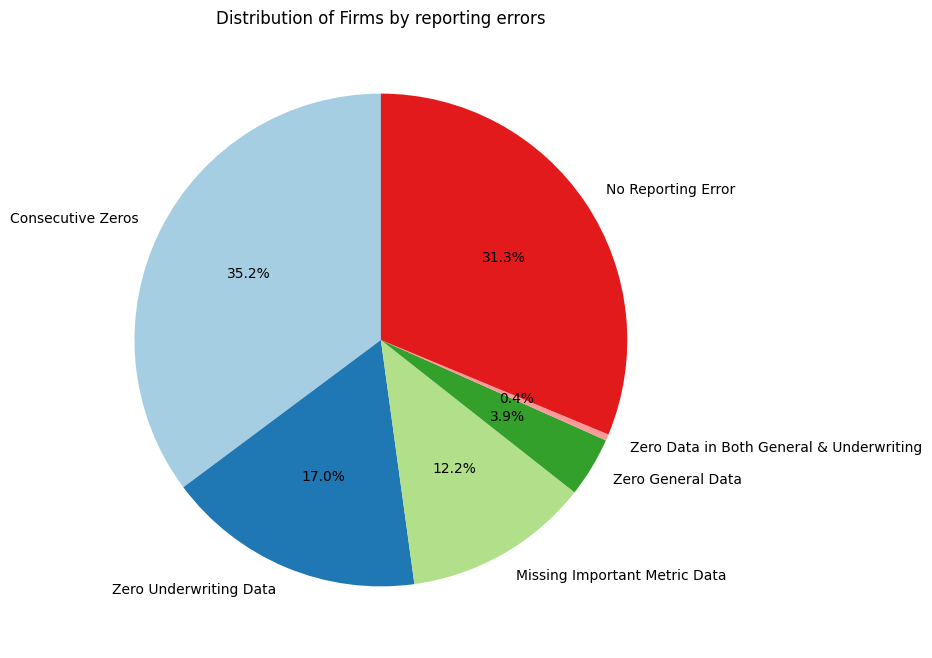

In [ ]:
# Check the columns of each DataFrame and ensure they match
print("Flagged Firms Columns:", flagged_firms.columns)
print("Incomplete Metrics Report Columns:", incomplete_metrics_report.columns)
print("Error Firms Columns:", df_error_firms.columns)

# Ensure that all DataFrames have the same columns: 'Firm', 'Metric', 'Flag'
# If necessary, align the columns by adding missing columns with NaN values

# For example, if any DataFrame is missing the 'Metric' or 'Flag' columns, add them
if 'Metric' not in flagged_firms.columns:
    flagged_firms['Metric'] = pd.NA
if 'Flag' not in flagged_firms.columns:
    flagged_firms['Flag'] = pd.NA

if 'Metric' not in incomplete_metrics_report.columns:
    incomplete_metrics_report['Metric'] = pd.NA
if 'Flag' not in incomplete_metrics_report.columns:
    incomplete_metrics_report['Flag'] = pd.NA

if 'Metric' not in df_error_firms.columns:
    df_error_firms['Metric'] = pd.NA
if 'Flag' not in df_error_firms.columns:
    df_error_firms['Flag'] = pd.NA

# Combine the three DataFrames
combined_df = pd.concat([flagged_firms, incomplete_metrics_report, df_error_firms])

# Get the total number of flagged firms
flagged_firm_count = combined_df['Firm'].nunique()

# Calculate the number of firms with no reporting errors
total_firms = 325
no_error_firms_count = total_firms - flagged_firm_count

# Count the number of firms for each flag
firm_counts = combined_df['Flag'].value_counts()

# Add the 'No Reporting Error' count
firm_counts['No Reporting Error'] = no_error_firms_count

# Plot the pie chart based on the flag counts
plt.figure(figsize=(8, 8))
plt.pie(firm_counts, labels=firm_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Firms by reporting errors')
plt.show()


The above plot shows the reporting error made in the data. There is only 31.3% of data which aren't missing any important metric informataion. The highest being consecutive zero error which is the firms having unreported data for consecutive years followed by empty underwriting data.

##Clustering of firms

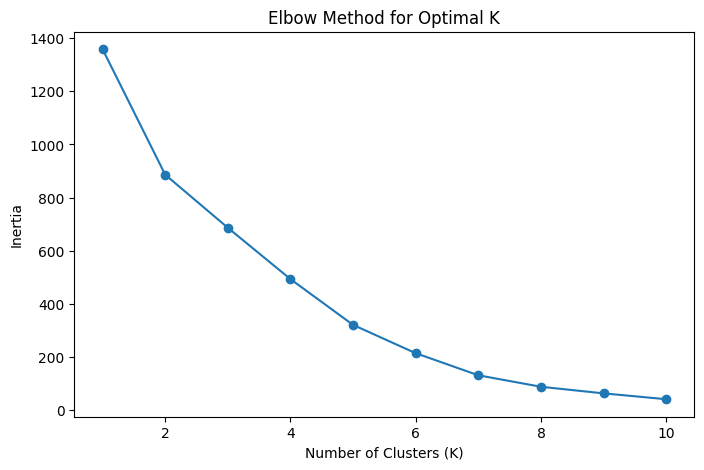

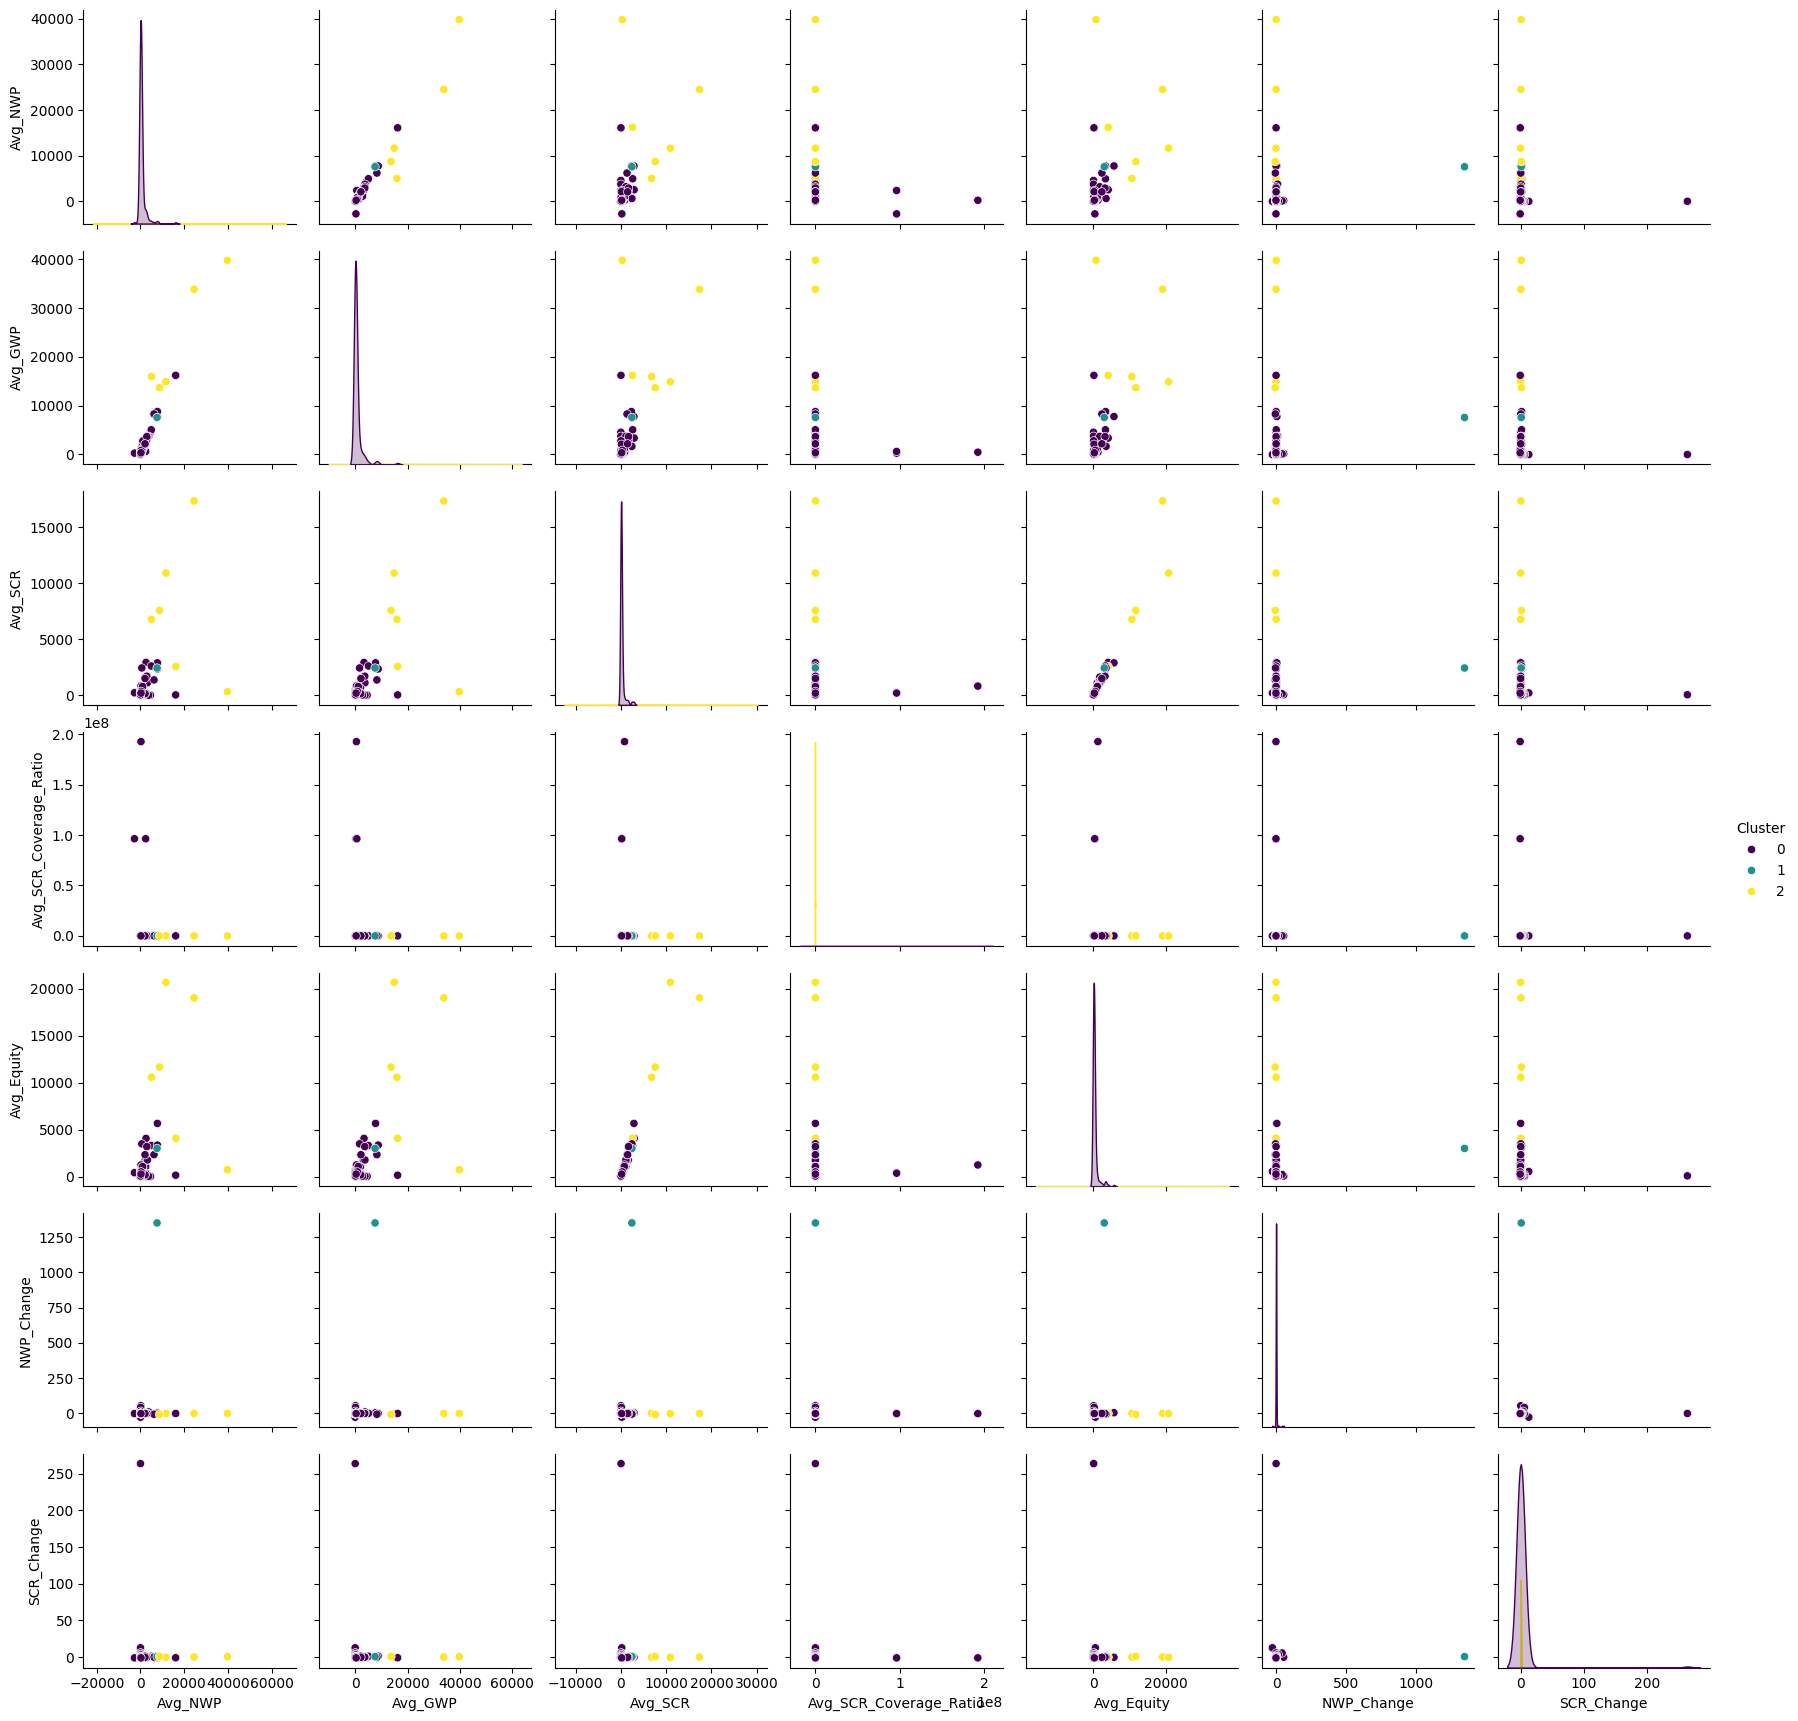

In [ ]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# Assuming df_cleaned_filtered is already loaded and cleaned
nwp_columns = ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020']
scr_columns = ['SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020']
scr_coverage_columns = ['SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018', 'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020']
gwp_columns = ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020']
equity_columns = ['Equity_2016', 'Equity_2017', 'Equity_2018', 'Equity_2019', 'Equity_2020']

# Handle potential non-numeric or NaN values by converting to numeric
df_cleaned_filtered[nwp_columns] = df_cleaned_filtered[nwp_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned_filtered[gwp_columns] = df_cleaned_filtered[gwp_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned_filtered[scr_columns] = df_cleaned_filtered[scr_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned_filtered[scr_coverage_columns] = df_cleaned_filtered[scr_coverage_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned_filtered[equity_columns] = df_cleaned_filtered[equity_columns].apply(pd.to_numeric, errors='coerce')

# Step 1: Compute the average values for NWP, GWP, SCR, SCR Coverage, and Equity
df_cleaned_filtered['Avg_NWP'] = df_cleaned_filtered[nwp_columns].mean(axis=1)
df_cleaned_filtered['Avg_GWP'] = df_cleaned_filtered[gwp_columns].mean(axis=1)
df_cleaned_filtered['Avg_SCR'] = df_cleaned_filtered[scr_columns].mean(axis=1)
df_cleaned_filtered['Avg_SCR_Coverage_Ratio'] = df_cleaned_filtered[scr_coverage_columns].mean(axis=1)
df_cleaned_filtered['Avg_Equity'] = df_cleaned_filtered[equity_columns].mean(axis=1)

# Step 2: Calculate percentage change between 2020 and 2016
epsilon = 1e-10  # small constant to avoid division by zero
df_cleaned_filtered['NWP_Change'] = np.where(df_cleaned_filtered['NWP_2016'] != 0,
                                             (df_cleaned_filtered['NWP_2020'] - df_cleaned_filtered['NWP_2016']) / (df_cleaned_filtered['NWP_2016'] + epsilon),
                                             0)
df_cleaned_filtered['SCR_Change'] = np.where(df_cleaned_filtered['SCR_2016'] != 0,
                                             (df_cleaned_filtered['SCR_2020'] - df_cleaned_filtered['SCR_2016']) / (df_cleaned_filtered['SCR_2016'] + epsilon),
                                             0)

# Step 3: Standardize the data before clustering
features = ['Avg_NWP', 'Avg_GWP', 'Avg_SCR', 'Avg_SCR_Coverage_Ratio', 'Avg_Equity', 'NWP_Change', 'SCR_Change']
X = df_cleaned_filtered[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'o-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 5: Perform KMeans clustering using the optimal number of clusters (e.g., k=3 from the elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Plot pair plots for important metrics, colored by cluster
sns.pairplot(df_cleaned_filtered[features + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()



1. Elbow Method Analysis

**Observation**:
* The Elbow plot shows that the inertia decreases significantly as the number of clusters increases, but the rate of decrease slows after 3 clusters. This indicates that 3 clusters might be an optimal choice, as adding more clusters beyond this point doesn't substantially reduce the within-cluster variance (inertia).

**Interpretation**:
* The chosen 3 clusters likely represent distinct groups of firms based on the selected financial metrics, capturing different patterns in their financial behaviors such as underwriting performance, solvency, and equity holdings.

2. Pairplot Visualization of Clusters

**Observation**:
* The pairplot visualization across the key financial metrics (Avg_NWP, Avg_GWP, Avg_SCR, Avg_SCR_Coverage_Ratio, Avg_Equity, NWP_Change, SCR_Change) highlights clear separations between the three clusters.
* Cluster 0 (purple): This group represents firms with generally lower financial metrics like NWP and SCR Coverage Ratios.
* Cluster 1 (teal): Firms in this cluster are scattered with relatively higher values for metrics like NWP and GWP, indicating large players in the market.
* Cluster 2 (yellow): Represents outlier firms with extreme values, such as very high equity and solvency ratios, possibly indicating strong financial stability or unique characteristics.

3. Insights from Using Averages

**Reason for Using Averages:**
* Averaging the financial metrics over the years (2016–2020) provides a more stable view of the firms' performance, smoothing out year-on-year fluctuations that could be caused by short-term events (e.g., economic downturns or external shocks). This allows the clustering algorithm to identify long-term trends and performance differences between firms, rather than reacting to isolated outlier values.
* Averages help in capturing the overall risk profile and business strategy, ensuring that firms with consistent performance trends are grouped appropriately.
* Insight: Firms with higher average NWP and GWP typically belong to more stable or growing clusters, while those with lower averages, especially in SCR Coverage Ratio, may belong to riskier clusters.

4. Key Cluster Characteristics

* **Cluster 0**: Represents smaller firms with lower underwriting volumes and solvency coverage. These firms may be more vulnerable to market fluctuations or have lower capital reserves.
* **Cluster 1**: Contains medium to large firms with higher NWP and GWP. These firms have relatively higher SCR and SCR Coverage Ratios, reflecting stronger solvency positions and ability to withstand financial shocks.
* **Cluster 2**: Comprises firms that are outliers, often with either extremely high SCR or large equity positions, suggesting a high degree of financial robustness.

5. Impact of Outliers on Clustering

* K-Means Sensitivity to Outliers: K-Means is based on minimizing the distance from the centroid of each cluster to its constituent data points. As a result, outliers, which are data points with extreme values, can disproportionately influence the placement of centroids. This can lead to clusters being stretched or misaligned, as the algorithm tries to accommodate these outliers.
* Example: In the current clustering, Cluster 2 appears to contain firms with extreme values for metrics like NWP and SCR, which may not necessarily represent typical behavior but are instead a result of a few extreme outliers.
* Misinterpretation of Clusters: Without accounting for outliers, there is a risk that the clusters may not reflect actual groupings based on core financial stability or performance. For instance, firms with anomalously high NWP or equity may belong to a distinct cluster not because they have similar operational strategies but merely because they are extreme cases.
* Potential Distortion: Outliers can distort the distribution of key metrics (e.g., high equity or SCR ratios), creating an artificial separation between clusters, which can make the analysis less useful for decision-making or identifying genuine performance patterns.

Conclusion:

The clustering analysis provided valuable insights into firm segmentation, but outliers significantly impacted the results, distorting the cluster boundaries. Relying solely on clustering can lead to misinterpretation, especially with firms showing extreme financial values. Further investigation using robust outlier handling and alternative clustering methods is necessary to derive more accurate insights. Deeper individual firm analysis is also crucial for a comprehensive understanding.

##Analyzing Firm Size

Metrics to Analyze Firm Size:


*   Gross Written Premiums (GWP): This is a key indicator of the size of an insurance firm, as it shows the total premium underwritten by the company before deductions such as reinsurance costs.
*   Net Written Premiums (NWP): NWP is another crucial metric that shows the premium retained after reinsurance, reflecting the amount of risk a firm takes on.
*     Total Assets or SCR (Solvency Capital Requirement): This can show the financial stability and capacity of a firm.
*     Gross Claims Incurred: The volume of claims handled can also be used to estimate the operational scale of the firm.

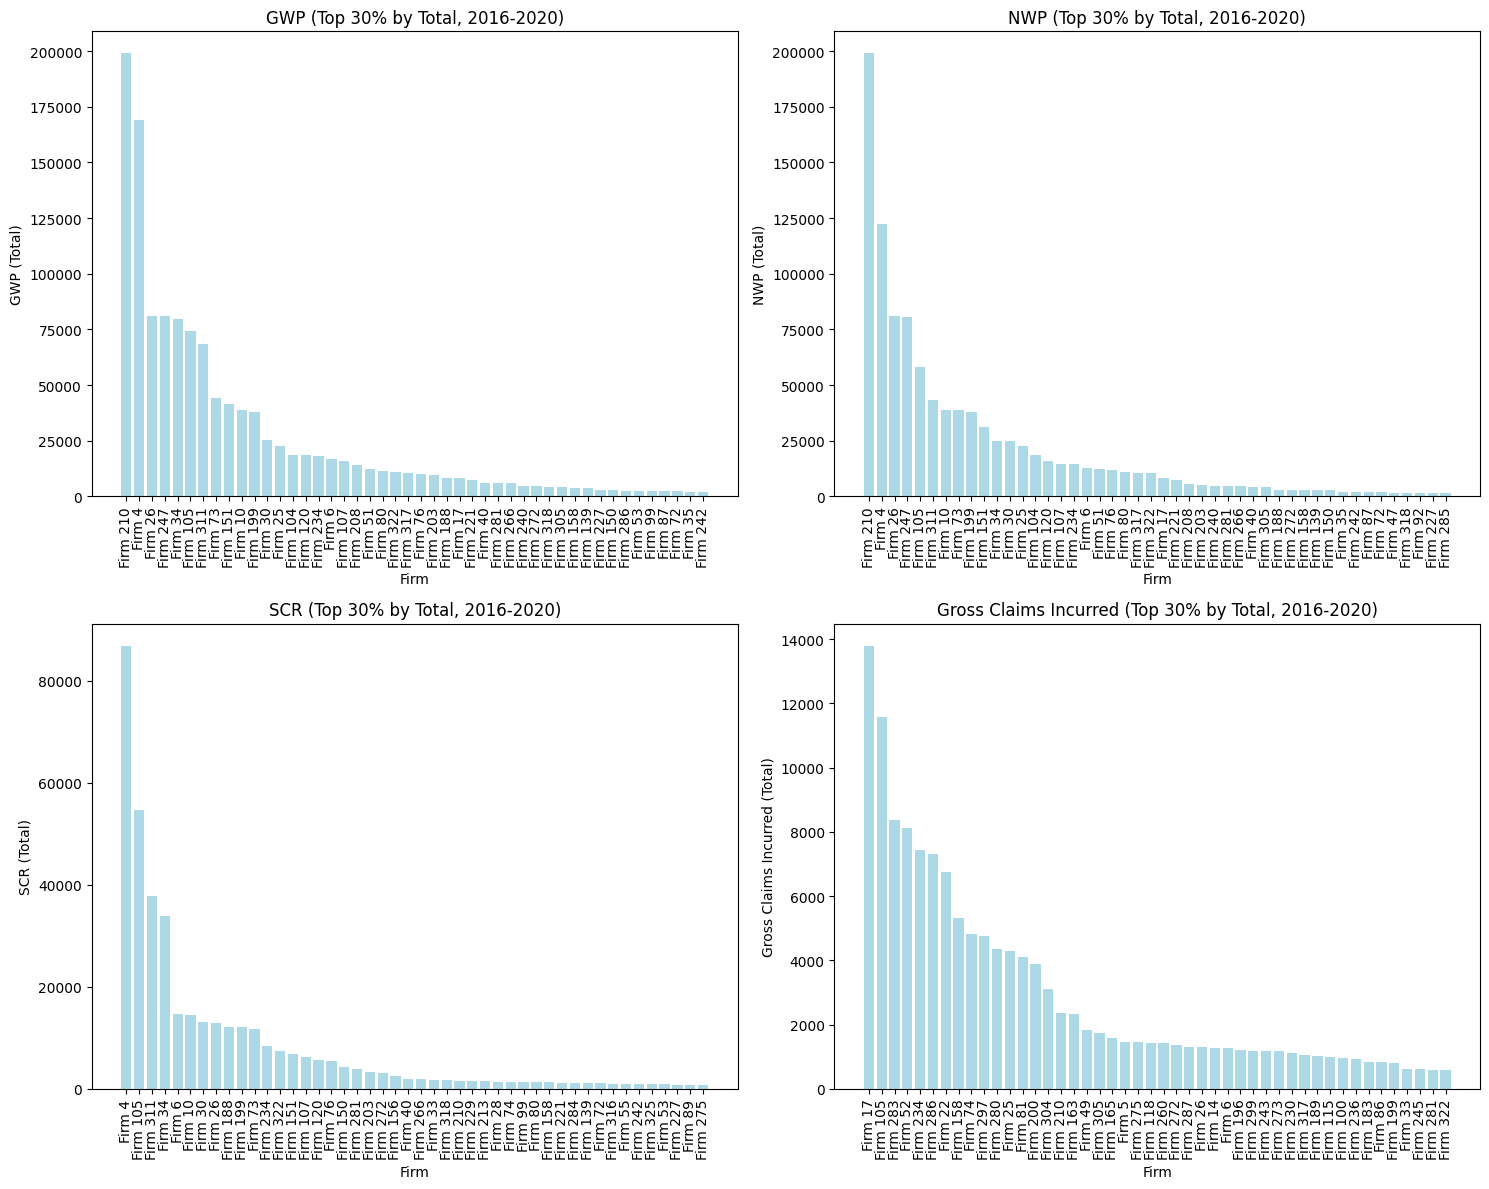

In [ ]:

# Define the metrics and their respective columns for each year
metrics = ['GWP', 'NWP', 'SCR', 'Gross Claims Incurred']
metric_columns = {
    'GWP': ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020'],
    'NWP': ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020'],
    'SCR': ['SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020'],
    'Gross Claims Incurred': ['Gross_claims_incurred_2016', 'Gross_claims_incurred_2017',
                              'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020']
}

# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Create a threshold percentile for top 30%
threshold_percentile = 70

# Create individual plots for each metric
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    axs[row, col].set_title(f'{metric} (Top 30% by Total, 2016-2020)')

    # Sum the values across the years for each firm
    df_final_filtered[metric + '_Total'] = df_final_filtered[metric_columns[metric]].sum(axis=1)

    # Calculate the 90th percentile for this metric
    percentile_value = np.percentile(df_final_filtered[metric + '_Total'], threshold_percentile)

    # Filter firms that are in the top 10%
    df_top_10 = df_final_filtered[df_final_filtered[metric + '_Total'] >= percentile_value]

    # Sort by the total value of the metric for better visualization
    df_sorted = df_top_10[['Firm', metric + '_Total']].sort_values(by=metric + '_Total', ascending=False)

    # Create a bar plot for the metric
    axs[row, col].bar(df_sorted['Firm'], df_sorted[metric + '_Total'], color='lightblue')
    axs[row, col].set_xlabel('Firm')
    axs[row, col].set_ylabel(f'{metric} (Total)')
    axs[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
#Firms with the largest size
df_top_10['Firm'].unique()

array(['Firm 5', 'Firm 6', 'Firm 14', 'Firm 17', 'Firm 22', 'Firm 25',
       'Firm 26', 'Firm 33', 'Firm 49', 'Firm 52', 'Firm 74', 'Firm 81',
       'Firm 86', 'Firm 100', 'Firm 105', 'Firm 115', 'Firm 118',
       'Firm 158', 'Firm 163', 'Firm 165', 'Firm 183', 'Firm 189',
       'Firm 196', 'Firm 199', 'Firm 200', 'Firm 210', 'Firm 230',
       'Firm 234', 'Firm 236', 'Firm 243', 'Firm 245', 'Firm 260',
       'Firm 272', 'Firm 273', 'Firm 275', 'Firm 280', 'Firm 281',
       'Firm 283', 'Firm 286', 'Firm 287', 'Firm 297', 'Firm 299',
       'Firm 304', 'Firm 305', 'Firm 317', 'Firm 322'], dtype=object)

Descriptive Statistics

In [ ]:
# Convert all columns except 'Firm' to float
cols_to_convert = df_final_filtered.columns.drop('Firm')
df_final_filtered[cols_to_convert] = df_final_filtered[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop the unwanted flag columns
flag_columns = ['NWP_flag', 'GWP_flag', 'SCR_flag', 'Equity_flag', 'Total_Assets_flag']
df_final_filtered.drop(columns=flag_columns, inplace=True, errors='ignore')

# Verify the changes
df_final_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 324
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Firm                          151 non-null    object 
 1   NWP_2016                      151 non-null    float64
 2   NWP_2017                      151 non-null    float64
 3   NWP_2018                      151 non-null    float64
 4   NWP_2019                      151 non-null    float64
 5   NWP_2020                      151 non-null    float64
 6   SCR_2016                      151 non-null    float64
 7   SCR_2017                      151 non-null    float64
 8   SCR_2018                      151 non-null    float64
 9   SCR_2019                      151 non-null    float64
 10  SCR_2020                      151 non-null    float64
 11  EoF_for_SCR_2016              151 non-null    float64
 12  EoF_for_SCR_2017              151 non-null    float64
 13  EoF_for_SC

In [ ]:
# Calculate descriptive statistics (mean, median, std) for key columns

key_columns = [
    'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
    'SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018', 'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020',
    'GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020',
    'Total_Assets_2016', 'Total_Assets_2017', 'Total_Assets_2018', 'Total_Assets_2019', 'Total_Assets_2020',
    'Total_Liabilities_2016', 'Total_Liabilities_2017', 'Total_Liabilities_2018', 'Total_Liabilities_2019', 'Total_Liabilities_2020',
    'Equity_2016', 'Equity_2017', 'Equity_2018', 'Equity_2019', 'Equity_2020',
    'Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020',
    'Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018', 'Net_combined_ratio_2019', 'Net_combined_ratio_2020'
]
# Summary statistics for each key metric
summary_stats = df_final_filtered[key_columns].describe()

# Return the result
summary_stats

NWP_2016      NWP_2017      NWP_2018      NWP_2019      NWP_2020  \
count    151.000000    151.000000    151.000000    151.000000    151.000000   
mean    1279.336136   1363.199849   1538.222345   1429.656805   1271.973618   
std     5425.452555   4493.880221   5197.751105   4807.442343   4311.010959   
min    -1862.240506    -64.679046   -193.083319   -181.612136  -1336.553317   
25%        3.135391     10.245478      9.476477     10.333496      3.791723   
50%       24.864397     48.775591     51.267192     51.768058     31.106772   
75%      262.635147    382.349528    393.817515    405.882189    375.551118   
max    45309.838702  38199.311256  48117.993733  44638.769640  40135.692258   

       SCR_Coverage_Ratio_2016  SCR_Coverage_Ratio_2017  \
count               151.000000               151.000000   
mean                  2.312446                 2.395159   
std                   2.187611                 2.505441   
min                  -1.974450                -1.973652   
25%                   1.350358                 1.366598   
50%                   1.652240                 1.704662   
75%                   2.518430                 2.376794   
max                  13.322499                23.287667   

       SCR_Coverage_Ratio_2018  SCR_Coverage_Ratio_2019  \
count               151.000000               151.000000   
mean                  2.485284                 2.924130   
std                   3.015657                 5.240875   
min                   0.243895                 0.000000   
25%                   1.397568                 1.426948   
50%                   1.718799                 1.771084   
75%                   2.325451                 2.562179   
max                  31.014353                53.353014   

       SCR_Coverage_Ratio_2020  ...  Gross_claims_incurred_2016  \
count               151.000000  ...                  151.000000   
mean                  2.209894  ...                  189.493942   
std                   2.657187  ...                  497.895536   
min                   0.000000  ...                  -43.149090   
25%                   1.339641  ...                    0.000000   
50%                   1.644977  ...                   26.358798   
75%                   2.265156  ...                  137.029471   
max                  23.436204  ...                 4487.909385   

       Gross_claims_incurred_2017  Gross_claims_incurred_2018  \
count                  151.000000                  151.000000   
mean                   210.055792                  207.728843   
std                    454.461010                  435.594070   
min                    -98.000283                  -42.526820   
25%                      0.003410                    0.119172   
50%                     32.667278                   46.451728   
75%                    165.989192                  197.492120   
max                   2767.075602                 2331.877573   

       Gross_claims_incurred_2019  Gross_claims_incurred_2020  \
count                  151.000000                  151.000000   
mean                   200.679389                  185.869480   
std                    466.805530                  412.134796   
min                    -18.295436                  -20.837636   
25%                      0.000000                    0.000000   
50%                     26.997996                   10.248752   
75%                    163.272139                  150.063722   
max                   3408.591632                 2289.622040   

       Net_combined_ratio_2016  Net_combined_ratio_2017  \
count               151.000000               151.000000   
mean                  2.573237              -287.969611   
std                  21.542584              3757.592345   
min                -124.288370            -46116.696842   
25%                   0.000000                 0.000000   
50%                   0.908591                 0.926715   
75%                   1.049335                

  **Average Values (Mean):**
        Most firms have moderately high values for key metrics like Net Written Premium (NWP), Gross Written Premium (GWP), and SCR Coverage Ratio (~1279 on average).

  **High Variability (Standard Deviation):**
        There is a large variation among firms, with some being much larger or riskier than others. The standard deviation (~5425) shows that a few firms have significantly higher values than most others.

  **Negative Values (Minimum):**
        Some firms show negative values for metrics like NWP and Gross Claims Incurred, indicating possible financial losses or anomalies in the data.

  **Median vs. Mean (Quartiles):**
        The median (50%) is much lower than the average, meaning that the average is being pulled up by a few very large firms.
        The 75% quartile shows that most firms have smaller values, but a few have extremely high metrics (outliers).

  **Extreme Maximum Values (Outliers):**
        Some firms have extremely high values for metrics like NWP and GWP (~45,000), indicating that a few large firms dominate the dataset. These outliers are worth further investigation.

Key Takeaways:

  **Firms are Highly Diverse:**
        Some firms are very large and others are much smaller. The high variability suggests a few outliers are dominating the averages.

  **Possible Financial Issues:**
        Firms with negative NWP or very high Gross Claims Incurred may be facing financial instability or losses, and need more supervisory attention.

  **Outliers:**
        A few firms with extremely high values (for example, NWP and GWP) may skew the overall data, and they might require closer analysis to see if they are truly exceptional or outliers in the market.

  **Focus on Stability and Risk:**
        We should focus on firms with unusual values for key metrics and those with significant changes year over year to determine which need more supervision.


##Outlier Detection

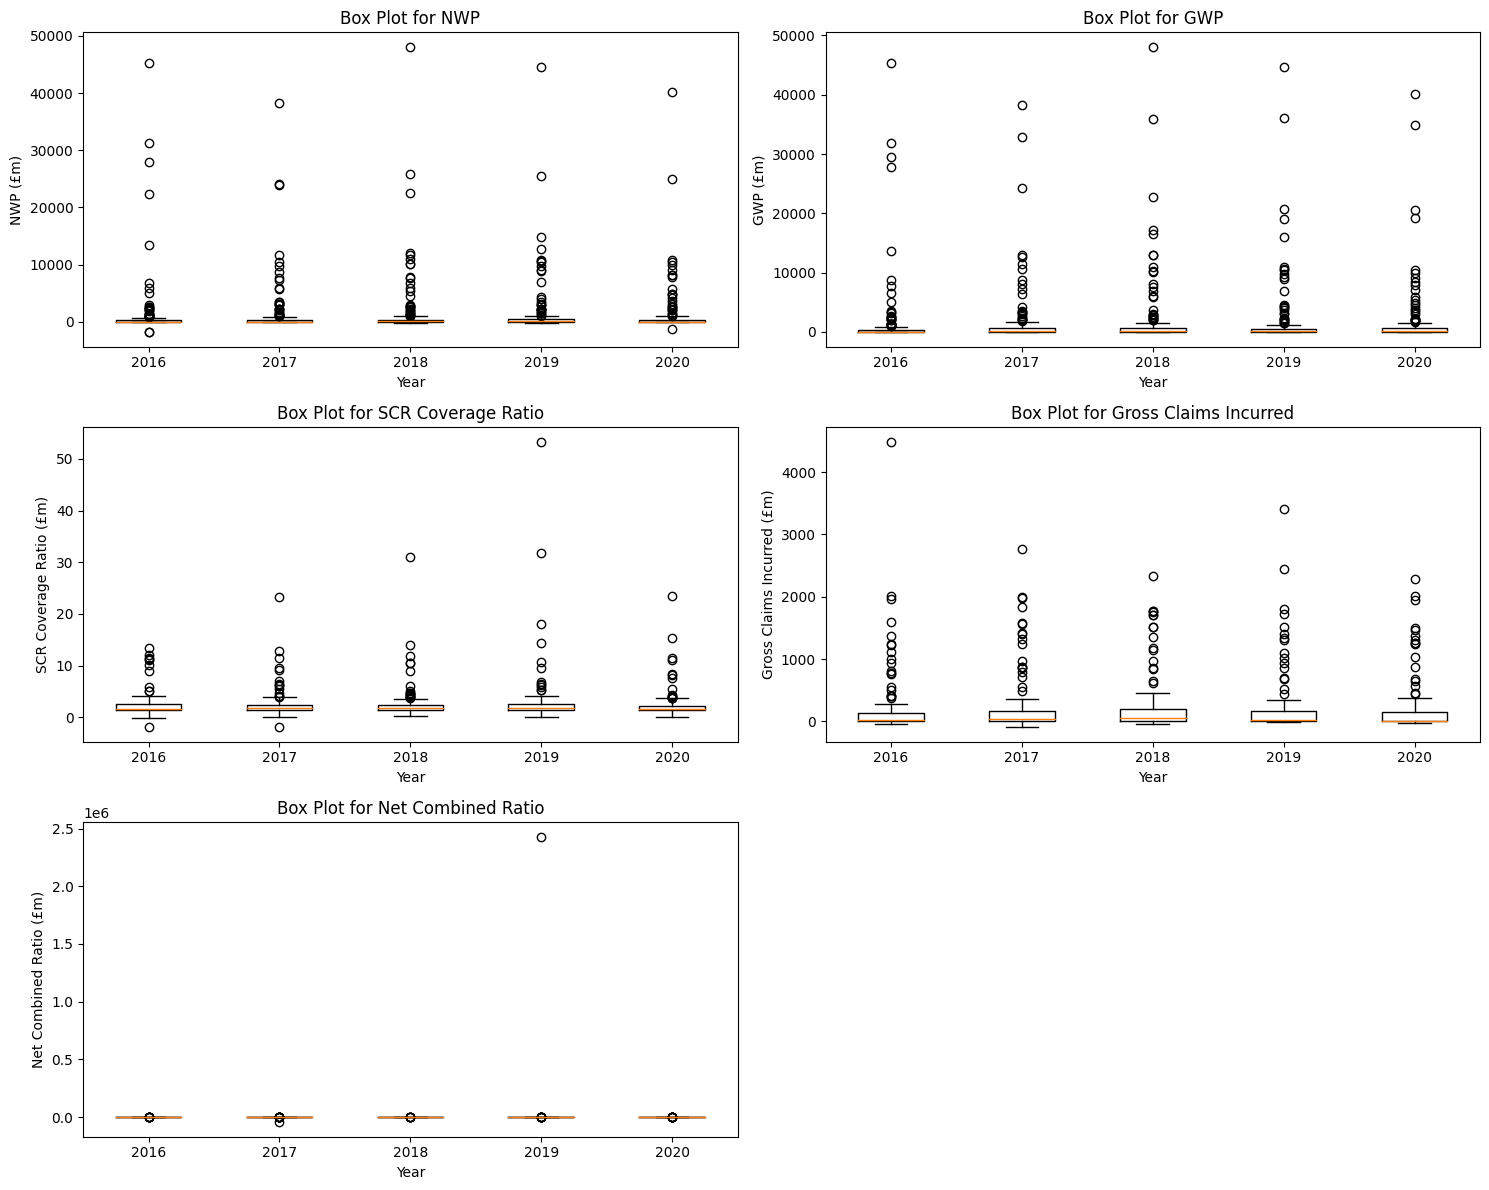

In [ ]:
import matplotlib.pyplot as plt

# List of years for which we have the metrics
years = ['2016', '2017', '2018', '2019', '2020']

# Dictionary to map the metrics to their respective columns across years
metrics_columns = {
    'NWP': ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020'],
    'GWP': ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020'],
    'SCR Coverage Ratio': [
        'SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018',
        'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020'
    ],
    'Gross Claims Incurred': [
        'Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018',
        'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020'
    ],
    'Net Combined Ratio': [
        'Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018',
        'Net_combined_ratio_2019', 'Net_combined_ratio_2020'
    ]
}

# Creating box plots for each metric across the years
plt.figure(figsize=(15, 12))

for i, (metric, columns) in enumerate(metrics_columns.items()):
    plt.subplot(3, 2, i+1)  # 3 rows, 2 columns layout
    plt.boxplot([df_final_filtered[col].dropna() for col in columns], labels=years)
    plt.title(f'Box Plot for {metric}')
    plt.xlabel('Year')
    plt.ylabel(f'{metric} (£m)')

plt.tight_layout()
plt.show()


**Net Written Premium (NWP):**Many firms have small NWP values, but there are significant outliers with extremely high NWP in each year.These outliers could represent large firms that dominate the market, which may need more supervision due to their size.

**Gross Written Premium (GWP)**:Similar to NWP, most firms have low to moderate GWP, but a few firms show extremely high values. These could be large firms handling a substantial portion of the insurance market.

**SCR Coverage Ratio**:There are several firms with high SCR ratios, indicating that they are holding significant capital. Some firms with extremely high SCR ratios may warrant closer attention to ensure they are not over-capitalizing unnecessarily.

**Gross Claims Incurred:**A few firms have extremely high claims compared to the rest. This could indicate financial stress or operational challenges. These firms may need closer monitoring.

**Net Combined Ratio:**There are clear outliers with high net combined ratios, which means some firms are running at a loss or near-breakeven point. Firms with a high combined ratio (> 100%) should be prioritized for supervision, as they may be unprofitable.

Identifying Firms with Outliers

In [ ]:
# Function to find firms that are outliers based on IQR
def find_firms_with_outliers(df, columns):
    outlier_firms = set()

    for column in columns:
        # Calculate IQR for each column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Add firms that are outliers to the set
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]['Firm']
        outlier_firms.update(outliers)

    return outlier_firms

# Applying the function to all years across the key metrics
metrics_to_analyze = [
    'NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020',
    'GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020',
    'SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018',
    'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020',
    'Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018',
    'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020',
    'Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018',
    'Net_combined_ratio_2019', 'Net_combined_ratio_2020'
]

# Finding and printing outlier firms
outlier_firms = find_firms_with_outliers(df_final_filtered, metrics_to_analyze)
print(outlier_firms)


{'Firm 318', 'Firm 70', 'Firm 55', 'Firm 26', 'Firm 10', 'Firm 105', 'Firm 247', 'Firm 200', 'Firm 228', 'Firm 133', 'Firm 89', 'Firm 81', 'Firm 17', 'Firm 75', 'Firm 34', 'Firm 280', 'Firm 210', 'Firm 51', 'Firm 199', 'Firm 73', 'Firm 275', 'Firm 209', 'Firm 201', 'Firm 311', 'Firm 235', 'Firm 4', 'Firm 88', 'Firm 146', 'Firm 30', 'Firm 203', 'Firm 221', 'Firm 47', 'Firm 104', 'Firm 240', 'Firm 305', 'Firm 178', 'Firm 272', 'Firm 196', 'Firm 212', 'Firm 234', 'Firm 317', 'Firm 183', 'Firm 107', 'Firm 76', 'Firm 165', 'Firm 180', 'Firm 161', 'Firm 39', 'Firm 266', 'Firm 6', 'Firm 163', 'Firm 158', 'Firm 283', 'Firm 243', 'Firm 99', 'Firm 297', 'Firm 286', 'Firm 208', 'Firm 250', 'Firm 5', 'Firm 49', 'Firm 151', 'Firm 177', 'Firm 304', 'Firm 46', 'Firm 80', 'Firm 322', 'Firm 22', 'Firm 25', 'Firm 2', 'Firm 28', 'Firm 284', 'Firm 306', 'Firm 72', 'Firm 188', 'Firm 69', 'Firm 120', 'Firm 53', 'Firm 74', 'Firm 40', 'Firm 281', 'Firm 166', 'Firm 52'}


Identifying the causation of outliers in each firm

         Firm              Metric  Year         Value
0      Firm 4                 NWP  2016  22344.199923
1      Firm 6                 NWP  2016   1826.798004
2     Firm 10                 NWP  2016   1273.949683
3     Firm 17                 NWP  2016   2642.301221
4     Firm 25                 NWP  2016   5077.284188
..        ...                 ...   ...           ...
467  Firm 166  Net Combined Ratio  2020    989.155405
468  Firm 178  Net Combined Ratio  2020     21.003690
469  Firm 203  Net Combined Ratio  2020      3.117125
470  Firm 228  Net Combined Ratio  2020   1076.158703
471  Firm 284  Net Combined Ratio  2020    906.307872

[472 rows x 4 columns]


<Figure size 1200x800 with 0 Axes>

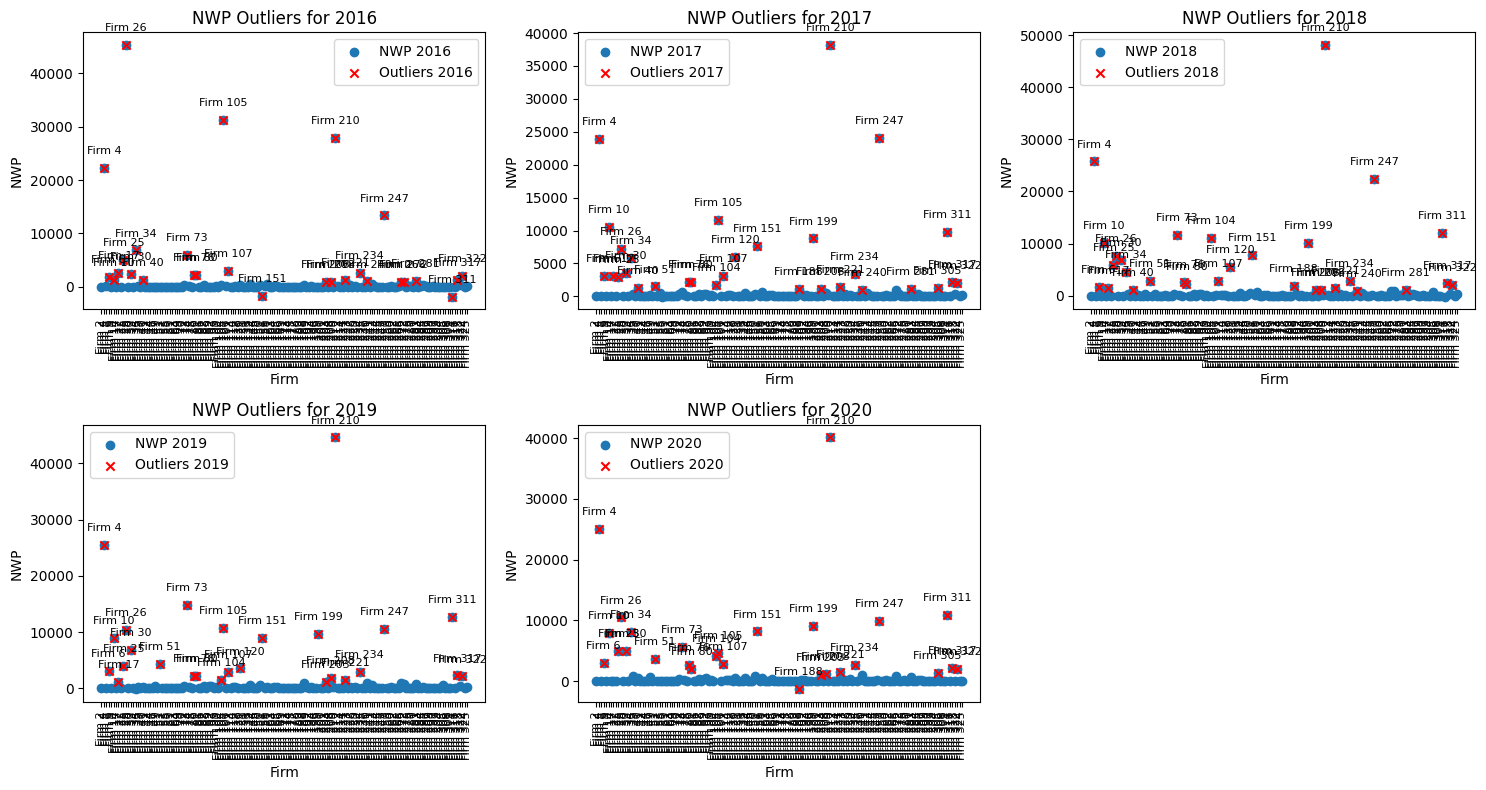

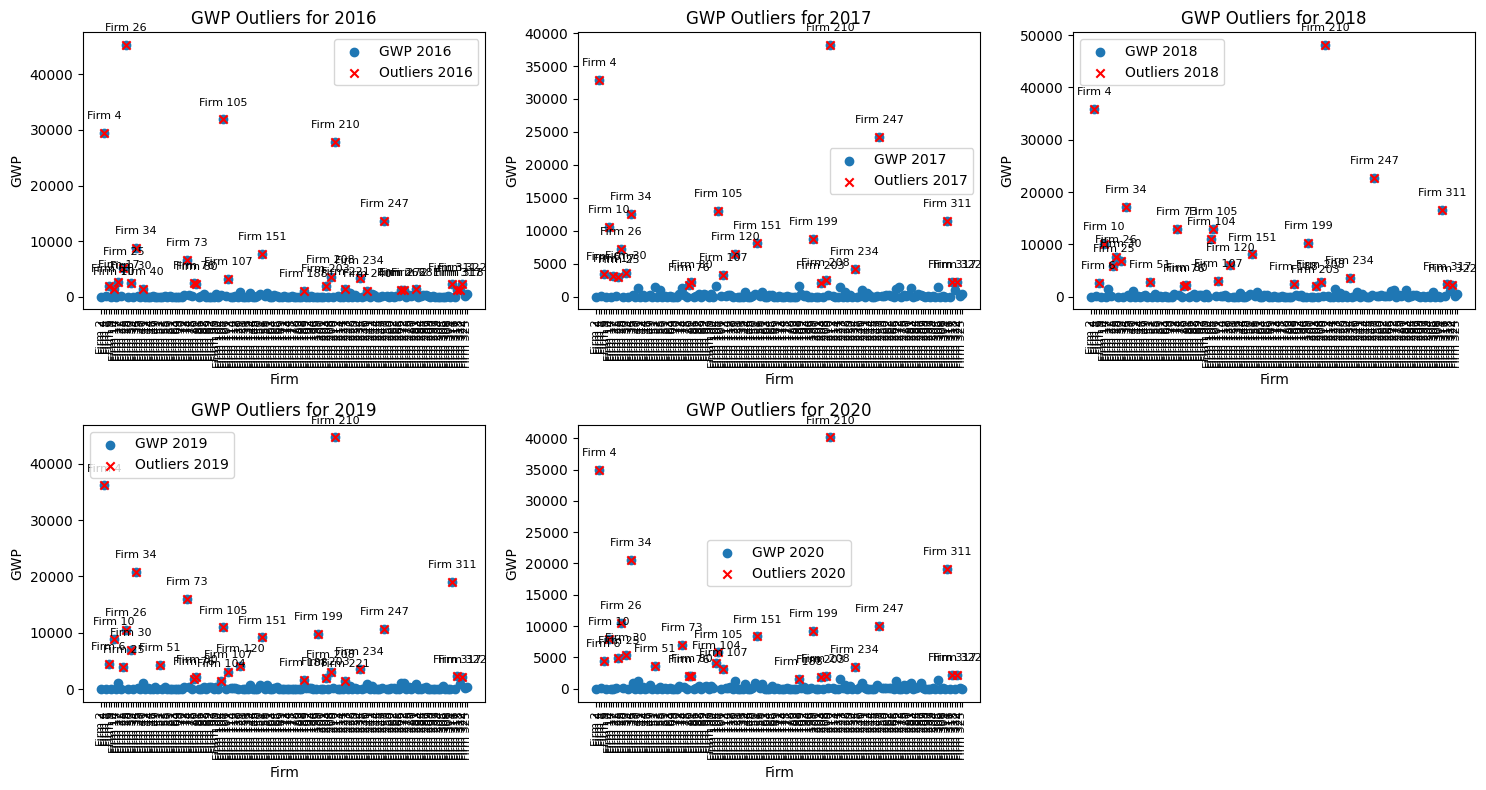

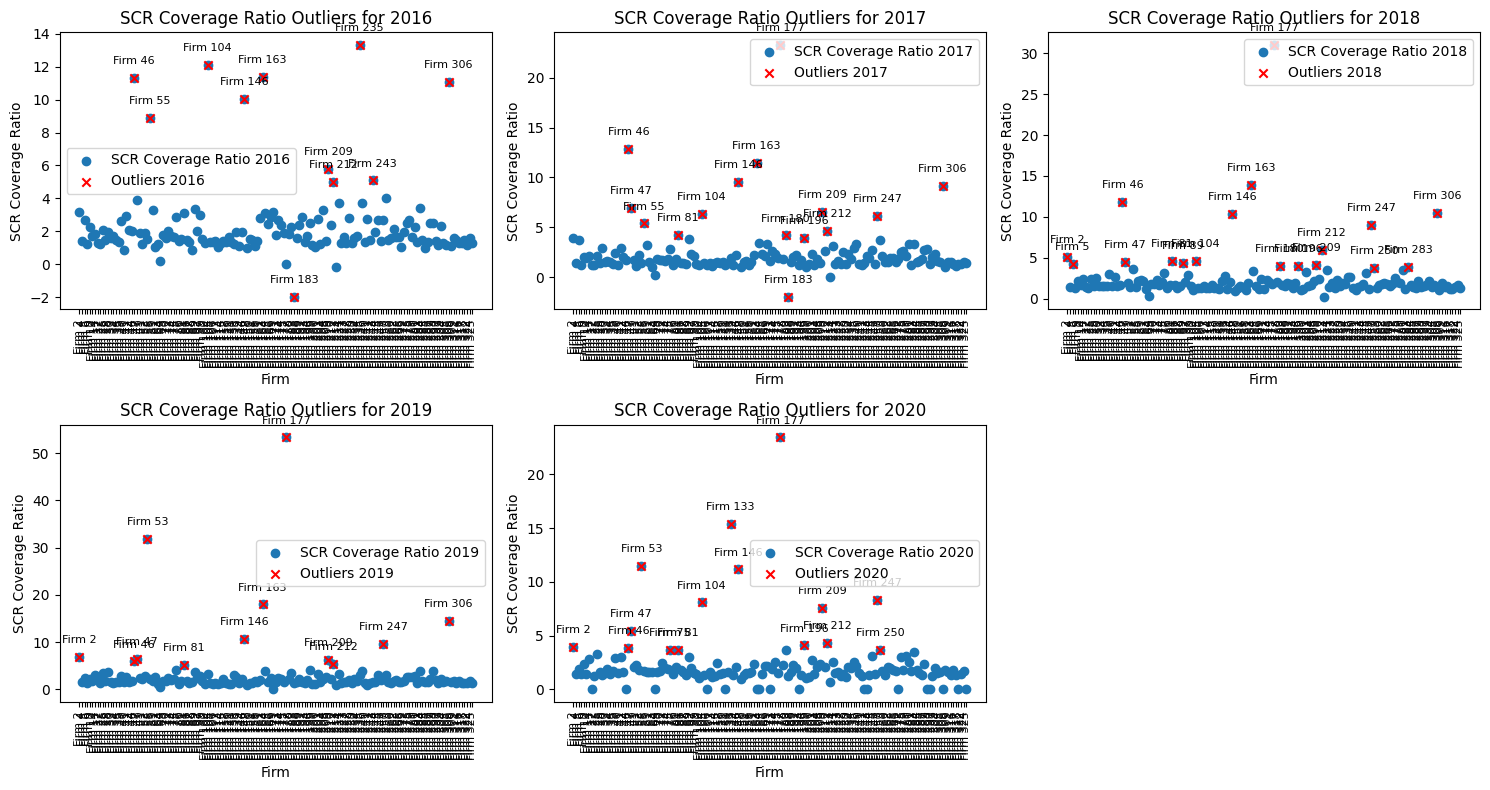

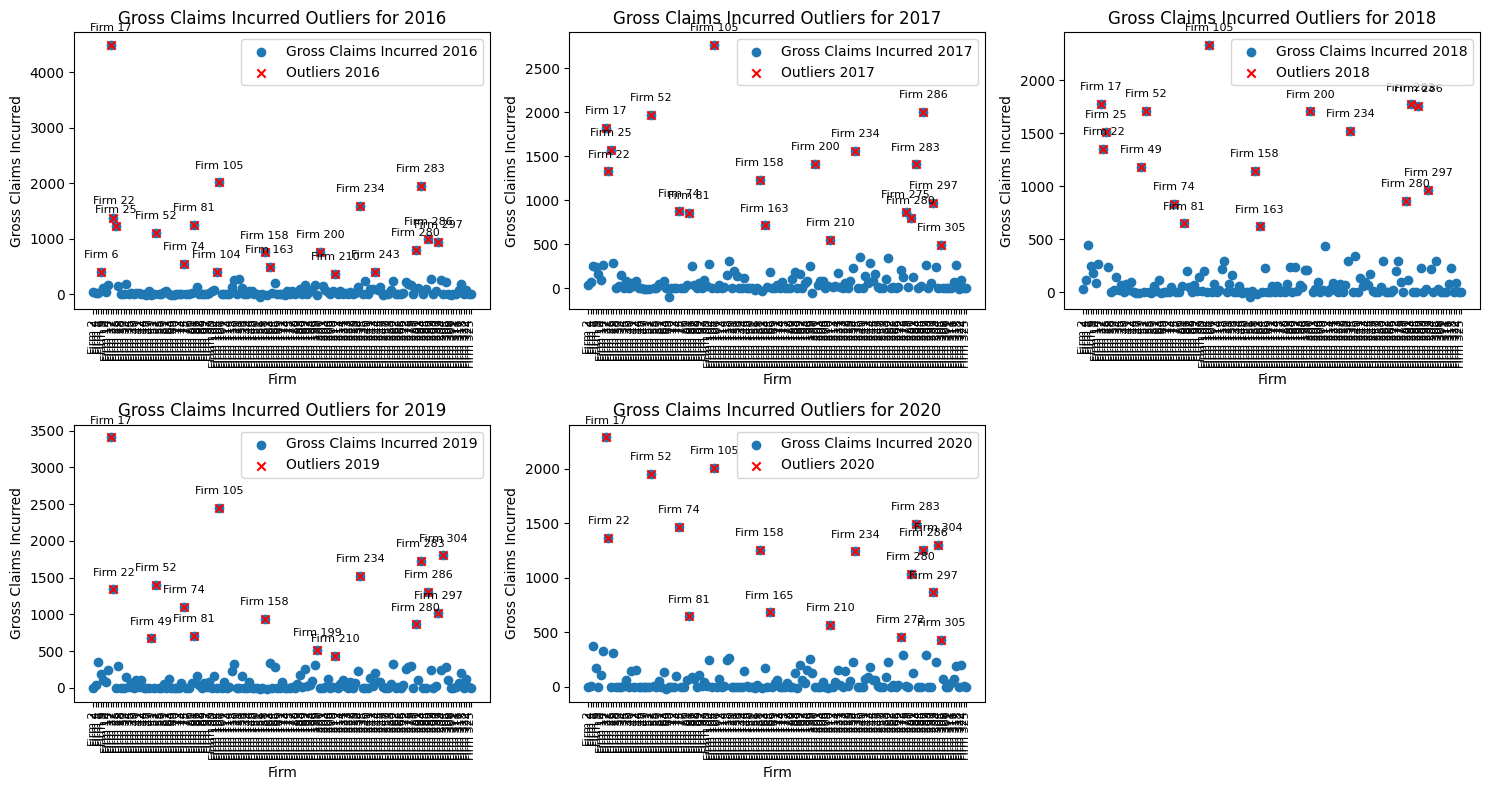

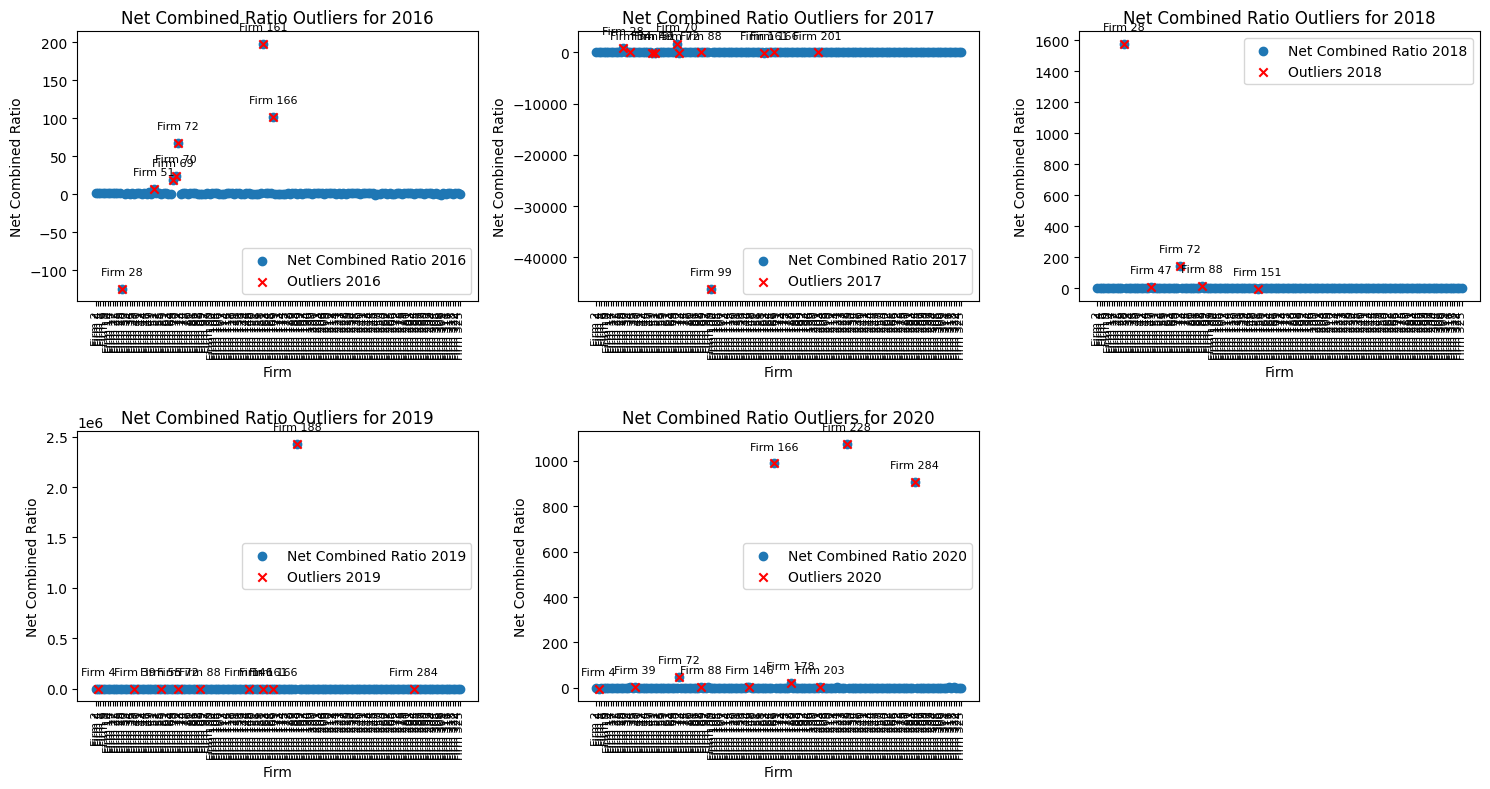

In [ ]:
# Function to find outliers based on IQR
def find_firms_outlier_by_metric(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return firms that are outliers for this specific metric
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][['Firm', column]].copy()
    outliers.rename(columns={column: 'Value'}, inplace=True)  # Renaming the relevant column to 'Value'
    return outliers

# Metrics and corresponding columns across the years
metrics_columns = {
    'NWP': ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020'],
    'GWP': ['GWP_2016', 'GWP_2017', 'GWP_2018', 'GWP_2019', 'GWP_2020'],
    'SCR Coverage Ratio': [
        'SCR_Coverage_Ratio_2016', 'SCR_Coverage_Ratio_2017', 'SCR_Coverage_Ratio_2018',
        'SCR_Coverage_Ratio_2019', 'SCR_Coverage_Ratio_2020'
    ],
    'Gross Claims Incurred': [
        'Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018',
        'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020'
    ],
    'Net Combined Ratio': [
        'Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018',
        'Net_combined_ratio_2019', 'Net_combined_ratio_2020'
    ]
}

# Create a summary table to collect outliers for each metric and year
outlier_summary = pd.DataFrame(columns=['Firm', 'Metric', 'Year', 'Value'])

# Loop through each metric and each year to find outliers
for metric, columns in metrics_columns.items():
    for year_column in columns:
        year = year_column.split('_')[-1]
        outliers = find_firms_outlier_by_metric(df_final_filtered, year_column)  # Find outliers for this year and metric

        outliers['Metric'] = metric  # Add the metric information
        outliers['Year'] = year  # Add the year information

        # Append to the summary table
        outlier_summary = pd.concat([outlier_summary, outliers], ignore_index=True)

# Display the summary table of outliers
print(outlier_summary)

# Plotting the outliers for visual inspection
plt.figure(figsize=(12, 8))
# Creating separate plots for each metric across all years
for metric, columns in metrics_columns.items():
    plt.figure(figsize=(15, 8))  # Adjust figure size

    # Create a separate plot for each year
    for i, year_column in enumerate(columns):
        year = year_column.split('_')[-1]

        # Plot for the metric in the given year
        plt.subplot(2, 3, i+1)  # Adjust subplot grid for better readability
        plt.scatter(df_final_filtered['Firm'], df_final_filtered[year_column], label=f'{metric} {year}')
        outliers = find_firms_outlier_by_metric(df_final_filtered, year_column)
        plt.scatter(outliers['Firm'], outliers['Value'], color='red', label=f'Outliers {year}', marker='x')

        # Annotating the outliers with firm numbers
        for idx, row in outliers.iterrows():
            plt.annotate(row['Firm'], (row['Firm'], row['Value']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

        plt.title(f'{metric} Outliers for {year}')
        plt.xlabel('Firm')
        plt.ylabel(metric)
        plt.xticks(rotation=90, fontsize=8)  # Rotate and reduce the font size for better readability
        plt.legend()

    plt.tight_layout()
    plt.show()


1. Net Written Premium (NWP) Trends

  Key Observation:


*   Firms like Firm 26 stand out with extremely high NWP values across several years (2016, 2017, 2018, 2019, 2020). These firms are likely to hold a large portion of the market and may have a high level of exposure to risk.
*   On the other hand, Firm 151 and Firm 311 showed negative NWP values in 2016, indicating possible losses or excess reliance on reinsurance during that period.

*  Firm 210 also consistently had high NWP values, especially in 2019 and 2020, signifying substantial growth in their market share.

  Inference:


*  Firms with high NWP, such as Firm 26 and Firm 210, should be monitored for risk exposure as they control large portions of the market. Any economic downturns or market disruptions could severely affect them.
*  Firms with negative NWP, like Firm 151 and Firm 311, may need closer attention to ensure they are managing risks effectively and not becoming overly reliant on reinsurance.

2. Gross Written Premium (GWP) Insights

  Key Observation:


*  Firms like Firm 4, Firm 26, and Firm 210 consistently exhibit very high GWP values, particularly from 2016 to 2020. This suggests that these firms are some of the largest players in the industry and likely have significant market power.
*  Firm 26 especially stands out with GWP values peaking above £45,000 in 2016 and remaining high throughout subsequent years.

  Inference:


* High GWP firms, such as Firm 26 and Firm 210, are market leaders, indicating strong customer acquisition and retention strategies. However, these firms must be watched for sustainability in their growth—rapid growth without adequate risk management could lead to future financial strain.

3. SCR Coverage Ratio Trends

  Key Observation:


*   Firm 177 in 2019 exhibited an extremely high SCR Coverage Ratio of over 53x, and in 2020, it remained above 23x. These values are significantly higher than other firms, suggesting overcapitalization or inefficiencies in capital usage.
*  Conversely, firms like Firm 183 showed negative SCR Coverage Ratios, which is a serious red flag indicating financial distress or undercapitalization.

  Inference:


*   Firms with very high SCR Coverage Ratios, such as Firm 177, may be
over-capitalized, which could indicate inefficiencies. Supervisors should ensure that such firms are utilizing their capital optimally.
*   Firms with negative or very low SCR ratios, such as Firm 183, should be flagged for immediate attention as they may face solvency risks.

4. Gross Claims Incurred Trends

  Key Observation:

*  Firms like Firm 17, Firm 52, and Firm 105 consistently appear as outliers in Gross Claims Incurred across multiple years. Firm 17, for instance, had very high claims in 2016 (£4,488) and 2019 (£3,409), while Firm 105 showed high claims in both 2017 (£2,767) and 2019 (£2,451).These firms may be facing operational challenges or high-risk portfolios, resulting in frequent and substantial claims.

    Inference:


*   Firms with consistently high claims (such as Firm 17 and Firm 105) may need to be monitored for operational efficiency and risk management practices. High claims ratios can directly affect profitability, and long-term losses could weaken the firm's financial standing.

5. Net Combined Ratio Insights

    Key Observation:


*   Firm 188 stands out in 2019 with a Net Combined Ratio of over £2.43 million, indicating severe financial losses during that year.
*   Other firms, such as Firm 72, exhibited combined ratios exceeding 100% across several years (2016, 2017, and 2018), which suggests these firms are operating at a loss in their underwriting and claims operations.
    Inference:


*   Firms with very high Net Combined Ratios, such as Firm 188, indicate significant operational inefficiencies or large claim payouts, leading to unprofitability. These firms should be closely supervised to ensure they do not face liquidity or solvency issues.
*   Firms like Firm 72, which have ratios above 100%, should also be reviewed for cost control and claims management strategies.

Conclusion:

*   Market Leaders: Firms like Firm 26, Firm 210, and Firm 4 are key players
with high NWP and GWP values, but their exposure to market risk is substantial. They should be monitored for financial stability as their market influence grows.
*   Financially Distressed Firms: Firms like Firm 151, Firm 311, and Firm 183 show signs of distress, with negative NWP, low SCR ratios, and high claims. These firms require immediate attention to ensure solvency and operational sustainability.
*  Profitability Concerns: Firms such as Firm 188 and Firm 72 are experiencing losses based on their high Net Combined Ratios, indicating inefficiencies or high claims costs that threaten their long-term profitability.




Identify Firms that are Repeatedly Outliers Across Years and Metrics

        Firm  Outlier_Count
0    Firm 10             10
1   Firm 104             12
2   Firm 105             14
3   Firm 107             10
4   Firm 120              6
..       ...            ...
75   Firm 74              5
77   Firm 76             10
78   Firm 80             10
79   Firm 81              9
80   Firm 88              4

[70 rows x 2 columns]


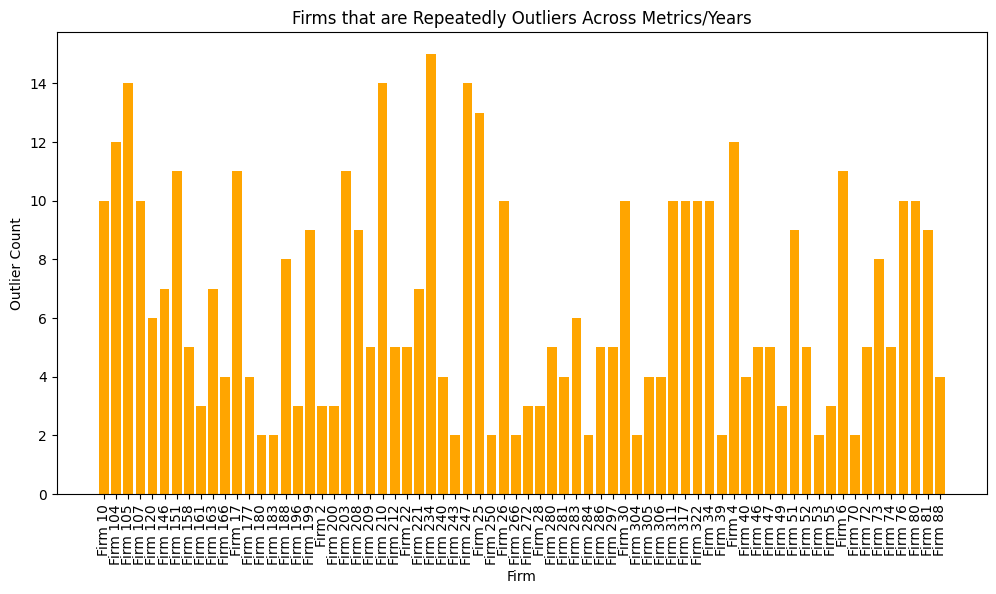

In [ ]:
# Group the outlier summary by Firm to see how often they appear as an outlier
outlier_count = outlier_summary.groupby('Firm').size().reset_index(name='Outlier_Count')
outlier_count = outlier_count[outlier_count['Outlier_Count'] > 1]  # Firms with multiple outlier appearances

# Firms that are repeatedly outliers
print(outlier_count)

# Visualize firms that are repeatedly outliers
plt.figure(figsize=(12, 6))
plt.bar(outlier_count['Firm'], outlier_count['Outlier_Count'], color='orange')
plt.xlabel('Firm')
plt.ylabel('Outlier Count')
plt.title('Firms that are Repeatedly Outliers Across Metrics/Years')
plt.xticks(rotation=90)
plt.show()


1. Firms Repeatedly Appearing as Outliers Across Multiple Years/ Metrics:

* Firm 105, Firm 4, Firm 26, Firm 210, Firm 247, Firm 311, Firm 73 consistently appear as outliers across years and metrics. These firms have unusually high metrics such as Net Written Premium (NWP), Gross Written Premium (GWP), and high combined ratios across the years.

Possible Reasons:

* Aggressive Growth Strategy: These firms could be aggressively growing their insurance portfolios, resulting in higher premium values (both NWP and GWP). This often leads to higher combined ratios, indicating that they may be experiencing high expenses or claims in relation to the premiums they’ve earned.
* Market Share Leaders: Firms like Firm 26 and Firm 210 stand out with exceptionally high NWP and GWP values across the years, suggesting they could be market leaders. High premium values might indicate their dominance in the insurance market.
*Poor Risk Management: Firms appearing across multiple risk-related metrics, such as the combined ratio or low SCR coverage (e.g., Firm 247, Firm 311), might have inadequate risk management strategies.


Risk Assessment: High Claims, Low SCR Ratios, High Combined Ratios    

Criteria for Financial Distress


1.    High Gross Claims Incurred: Firms with unusually high claims compared to peers could be facing higher-than-expected losses, suggesting poor risk management or underpricing.
2.     Low SCR Coverage Ratios: The Solvency Capital Requirement (SCR) is a regulatory requirement for firms to maintain enough capital to absorb shocks. A low SCR ratio could indicate a firm’s inability to cover potential risks.
2.   

    High Net Combined Ratios: A combined ratio greater than 100% indicates that the firm is paying out more in claims and expenses than it is earning in premiums.

         Firm              Metric  Year        Value
272   Firm 46  SCR Coverage Ratio  2016    11.321172
273   Firm 55  SCR Coverage Ratio  2016     8.906512
274  Firm 104  SCR Coverage Ratio  2016    12.105102
275  Firm 146  SCR Coverage Ratio  2016    10.037322
276  Firm 163  SCR Coverage Ratio  2016    11.371361
..        ...                 ...   ...          ...
467  Firm 166  Net Combined Ratio  2020   989.155405
468  Firm 178  Net Combined Ratio  2020    21.003690
469  Firm 203  Net Combined Ratio  2020     3.117125
470  Firm 228  Net Combined Ratio  2020  1076.158703
471  Firm 284  Net Combined Ratio  2020   906.307872

[200 rows x 4 columns]


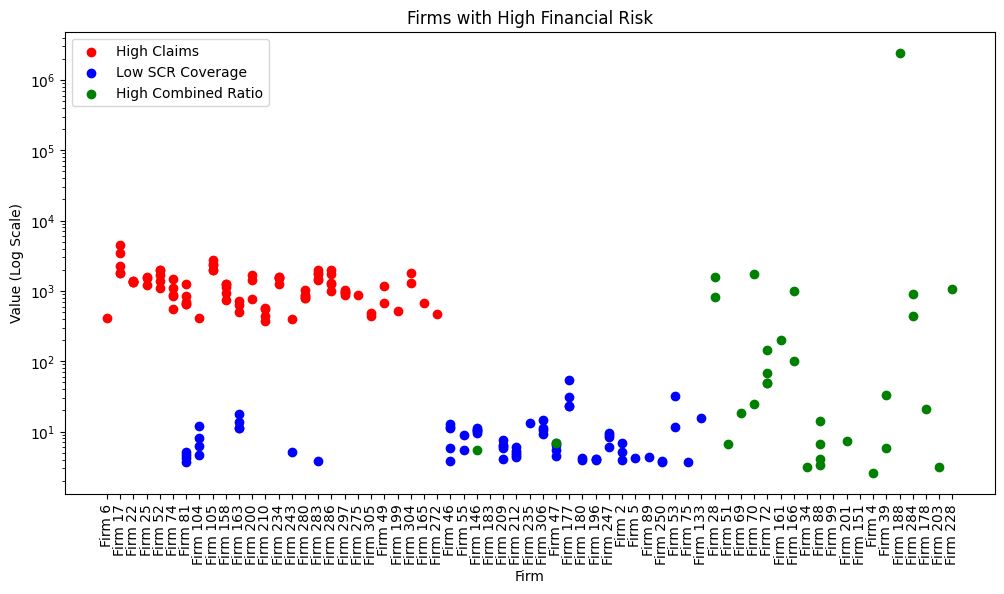

In [ ]:
# Filter out firms with high claims, low SCR ratios, or high combined ratios
high_risk_firms = outlier_summary[
    (outlier_summary['Metric'].isin(['Gross Claims Incurred', 'SCR Coverage Ratio', 'Net Combined Ratio'])) &
    ((outlier_summary['Metric'] == 'Gross Claims Incurred') |
     (outlier_summary['Metric'] == 'SCR Coverage Ratio') |
     (outlier_summary['Metric'] == 'Net Combined Ratio'))]

# High-risk firms are outliers for critical metrics
print(high_risk_firms)

plt.figure(figsize=(12, 6))

# Gross Claims Incurred outliers
gross_claims_outliers = high_risk_firms[high_risk_firms['Metric'] == 'Gross Claims Incurred']
plt.scatter(gross_claims_outliers['Firm'], gross_claims_outliers['Value'], color='red', label='High Claims')

# Low SCR Coverage Ratio outliers
scr_outliers = high_risk_firms[high_risk_firms['Metric'] == 'SCR Coverage Ratio']
plt.scatter(scr_outliers['Firm'], scr_outliers['Value'], color='blue', label='Low SCR Coverage')

# High Net Combined Ratio outliers
net_combined_outliers = high_risk_firms[high_risk_firms['Metric'] == 'Net Combined Ratio']
plt.scatter(net_combined_outliers['Firm'], net_combined_outliers['Value'], color='green', label='High Combined Ratio')

plt.yscale('log')  # Applying logarithmic scale
plt.xlabel('Firm')
plt.ylabel('Value (Log Scale)')
plt.title('Firms with High Financial Risk')
plt.xticks(rotation=90)
plt.legend()
plt.show()



2. Risk Assessment Based on High Claims, Low SCR, or High Combined Ratios:

  Firms with high claims, low SCR coverage, or high combined ratios are highlighted with different colors in the scatter plot:
*      Red (High Claims): Firms like Firm 105, Firm 210, Firm 17, etc., consistently have high claim values. High claims might indicate poor underwriting policies or increased exposure to risky sectors.
* Blue (Low SCR Coverage): Firms such as Firm 104, Firm 46, Firm 47 show low SCR coverage, meaning they may not have enough capital to cover the risks they underwrite. This indicates potential solvency issues.
* Green (High Combined Ratio): Firms like Firm 4, Firm 146, Firm 161, Firm 188 have high combined ratios, which suggests they are either overspending on expenses or have high claims relative to their earned premiums. This could imply poor operational efficiency or high losses.

Possible Reasons for Financial Distress:

* High Claims (Red): Firm 105 and Firm 210 could be facing abnormally high claim payouts due to underwriting risks that are not properly priced or due to specific adverse events in certain markets.
* Low SCR Coverage (Blue):       Firm 104 and Firm 46 could be undercapitalized. A low SCR coverage ratio indicates that the firm might be taking on more risk than it has the financial strength to cover, which could be a regulatory concern.
* High Combined Ratio (Green):        Firm 4 and Firm 146 may have high operating costs, and these firms could be pricing their premiums too low relative to the risks they are covering. If the combined ratio is above 100%, it means the company is operating at a loss.

3. Firm-Level Insights and Financial Risk:

*   Firm 210: This firm stands out with significantly high values across the
board, particularly in NWP and GWP. However, high claims and low SCR coverage indicate potential liquidity issues or exposure to riskier insurance sectors.
* Firm 4: Firm 4 has a high combined ratio and claims, which suggests inefficiency in managing costs related to claims or operational expenses.
* Firm 105: Repeatedly an outlier in high NWP, GWP, and claims. This firm might be taking aggressive market positions, but the high claims could indicate it’s not sufficiently pricing the risks it's taking on.

##Year-on-Year Change Analysis

In [ ]:
#Step 1: Calculate Year-on-Year Changes for Each Metric
# Function to calculate year-on-year percentage changes
def calculate_yoy_changes(df, columns, metric_name):
    # Create a dataframe to store the year-on-year changes
    yoy_changes = pd.DataFrame()

    for i in range(1, len(columns)):
        year = columns[i].split('_')[-1]
        previous_year = columns[i-1].split('_')[-1]

        # Calculate the percentage change between the current year and the previous year
        yoy_change = (df[columns[i]] - df[columns[i-1]]) / df[columns[i-1]] * 100
        yoy_changes[f'{metric_name}_YoY_{previous_year}_{year}'] = yoy_change

    return yoy_changes

# Define the columns for each metric
metrics_columns = {
    'NWP': ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020'],
    'SCR Coverage Ratio': ['SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020'],
    'Gross Claims Incurred': ['Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020'],
    'Net Combined Ratio': ['Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018', 'Net_combined_ratio_2019', 'Net_combined_ratio_2020'],
    'Gross Combined Ratio': ['Gross_combined_ratio_2016', 'Gross_combined_ratio_2017', 'Gross_combined_ratio_2018', 'Gross_combined_ratio_2019', 'Gross_combined_ratio_2020'],
}

# Initialize a dataframe to hold all the YoY changes
yoy_changes_df = pd.DataFrame()

# Apply the YoY calculation for each metric
for metric, columns in metrics_columns.items():
    yoy_df = calculate_yoy_changes(df_final_filtered, columns, metric)
    yoy_changes_df = pd.concat([yoy_changes_df, yoy_df], axis=1)

# Combine the original data with the YoY changes
df_with_yoy_changes = pd.concat([df_final_filtered, yoy_changes_df], axis=1)

# Display the resulting dataframe with YoY changes
print("Year-on-Year Changes:")
df_with_yoy_changes


Year-on-Year Changes:


Firm      NWP_2016      NWP_2017      NWP_2018      NWP_2019  \
1      Firm 2     28.178059     26.865049     25.064438     23.226445   
3      Firm 4  22344.199923  23963.910709  25760.390158  25512.748836   
4      Firm 5     68.200993     51.663132     44.010833     42.008556   
5      Firm 6   1826.798004   3040.633852   1634.218908   3082.590166   
8      Firm 9     17.242252     15.745889     19.108723     15.480891   
..        ...           ...           ...           ...           ...   
316  Firm 317   1291.371330   2245.521194   2520.011342   2275.217791   
317  Firm 318    422.646163    327.038879    371.149157    441.155040   
321  Firm 322   2092.156137   2084.124818   2022.212247   2103.048716   
323  Firm 324     23.415380     22.650321     24.268465     25.811984   
324  Firm 325    240.999886    252.698937    332.521848    294.886332   

         NWP_2020      SCR_2016      SCR_2017      SCR_2018      SCR_2019  \
1       21.718558     10.190314     10.113572      9.495235      8.146471   
3    24996.021042  16573.644800  16332.748800  17103.616000  17219.246080   
4       81.273653     52.824396     38.053768     34.696815     57.231788   
5     3041.876078   2717.768106   2791.422212   2804.596443   3066.367918   
8        9.513967     11.353646     13.136767     13.416725     12.965932   
..            ...           ...           ...           ...           ...   
316   2150.070000     71.448273    129.992889    137.380823    167.075293   
317      0.000000    448.271908    412.401724    442.841323    393.414761   
321   2029.697013   1711.220667   1641.309461   1329.471064   1399.098954   
323     26.546638     32.096633     30.205948     29.517977     29.954935   
324      0.000000    209.181524    223.800930    256.862723    240.295897   

     ...  Gross Claims Incurred_YoY_2018_2019  \
1    ...                          -100.000000   
3    ...                           -69.953021   
4    ...                           -22.525915   
5    ...                           -24.343395   
8    ...                           -43.013431   
..   ...                                  ...   
316  ...                           -12.802113   
317  ...                           -55.923131   
321  ...                            51.273901   
323  ...                             5.523998   
324  ...                           -39.502541   

     Gross Claims Incurred_YoY_2019_2020  Net Combined Ratio_YoY_2016_2017  \
1                                    NaN                         21.108889   
3                             -81.696716                         58.051939   
4                               7.244724                        107.586323   
5                              -4.953094                        -13.773820   
8                            -100.000000                          5.811585   
..                                   ...                               ...   
316                            -3.072089                          4.618099   
317                           -52.031612                       -138.023723   
321                            59.287714                          1.773021   
323                           -29.607610                         -5.285428   
324                           -41.860578                               NaN   

     Net Combined Ratio_YoY_2017_2018  Net Combined Ratio_YoY_2018_2019  \
1                          -18.438531                       -100.000000   
3                           24.117130                         22.048446   
4                           -3.007700                        -14.000451   
5                           -0.927725                         -2.374930   
8                            2.868531                          5.703657   
..                                ...                               ...   
316                         -9.615647                         -5.909400   
317                      -2110.955062                         16.124910   
321   

In [ ]:
#Step 2: Flag Significant Year-on-Year Changes
# Flag significant YoY changes (greater than 20%)
significant_changes = yoy_changes_df[(yoy_changes_df.abs() > 20).any(axis=1)]

# Display the significant changes dataframe
print("Significant Year-on-Year Changes:")
significant_changes


Significant Year-on-Year Changes:


NWP_YoY_2016_2017  NWP_YoY_2017_2018  NWP_YoY_2018_2019  \
1            -4.659686          -6.702432          -7.333071   
3             7.248909           7.496604          -0.961326   
4           -24.248711         -14.811913          -4.549511   
5            66.446090         -46.254005          88.627738   
8            -8.678467          21.356905         -18.985215   
..                 ...                ...                ...   
316          73.886561          12.223895          -9.713986   
317         -22.621117          13.487778          18.861927   
321          -0.383878          -2.970675           3.997428   
323          -3.267335           7.144020           6.360186   
324           4.854380          31.588147         -11.318209   

     NWP_YoY_2019_2020  SCR Coverage Ratio_YoY_2016_2017  \
1            -6.492111                         -0.753084   
3            -2.025371                         -1.453488   
4            93.469287                        -27.961754   
5            -1.320775                          2.710095   
8           -38.543802                         15.705268   
..                 ...                               ...   
316          -5.500475                         81.939863   
317        -100.000000                         -8.001881   
321          -3.487875                         -4.085458   
323           2.846174                         -5.890600   
324        -100.000000                          6.988861   

     SCR Coverage Ratio_YoY_2017_2018  SCR Coverage Ratio_YoY_2018_2019  \
1                           -6.113937                        -14.204641   
3                            4.719764                          0.676056   
4                           -8.821607                         64.948247   
5                            0.471954                          9.333659   
8                            2.131107                         -3.359932   
..                                ...                               ...   
316                          5.683337                         21.614713   
317                          7.381055                        -11.161235   
321                        -18.999366                          5.237263   
323                         -2.277602                          1.480311   
324                         14.772858                         -6.449681   

     SCR Coverage Ratio_YoY_2019_2020  Gross Claims Incurred_YoY_2016_2017  \
1                          -10.088952                            -8.391254   
3                           13.827644                           341.060716   
4                           15.723822                           713.093203   
5                            7.006180                           -42.594851   
8                          -15.140135                            34.559838   
..                                ...                                  ...   
316                         -1.727520                            37.184133   
317                       -100.000000                           242.886737   
321                         -0.273073                            16.539324   
323                          0.788226                             1.458603   
324                       -100.000000                            14.923266   

     Gross Claims Incurred_YoY_2017_2018  Gross Claims Incurred_YoY_2018_2019  \
1                             -19.322234                          -100.000000   
3                              58.106164                           -69.953021   
4                              81.494070                           -22.525915   
5                               5.044814                           -24.343395   
8                              14.449731                           -43.013431   
..                                   ...                                  ...   
316                           -12.334268                           -12.802113   
317                          

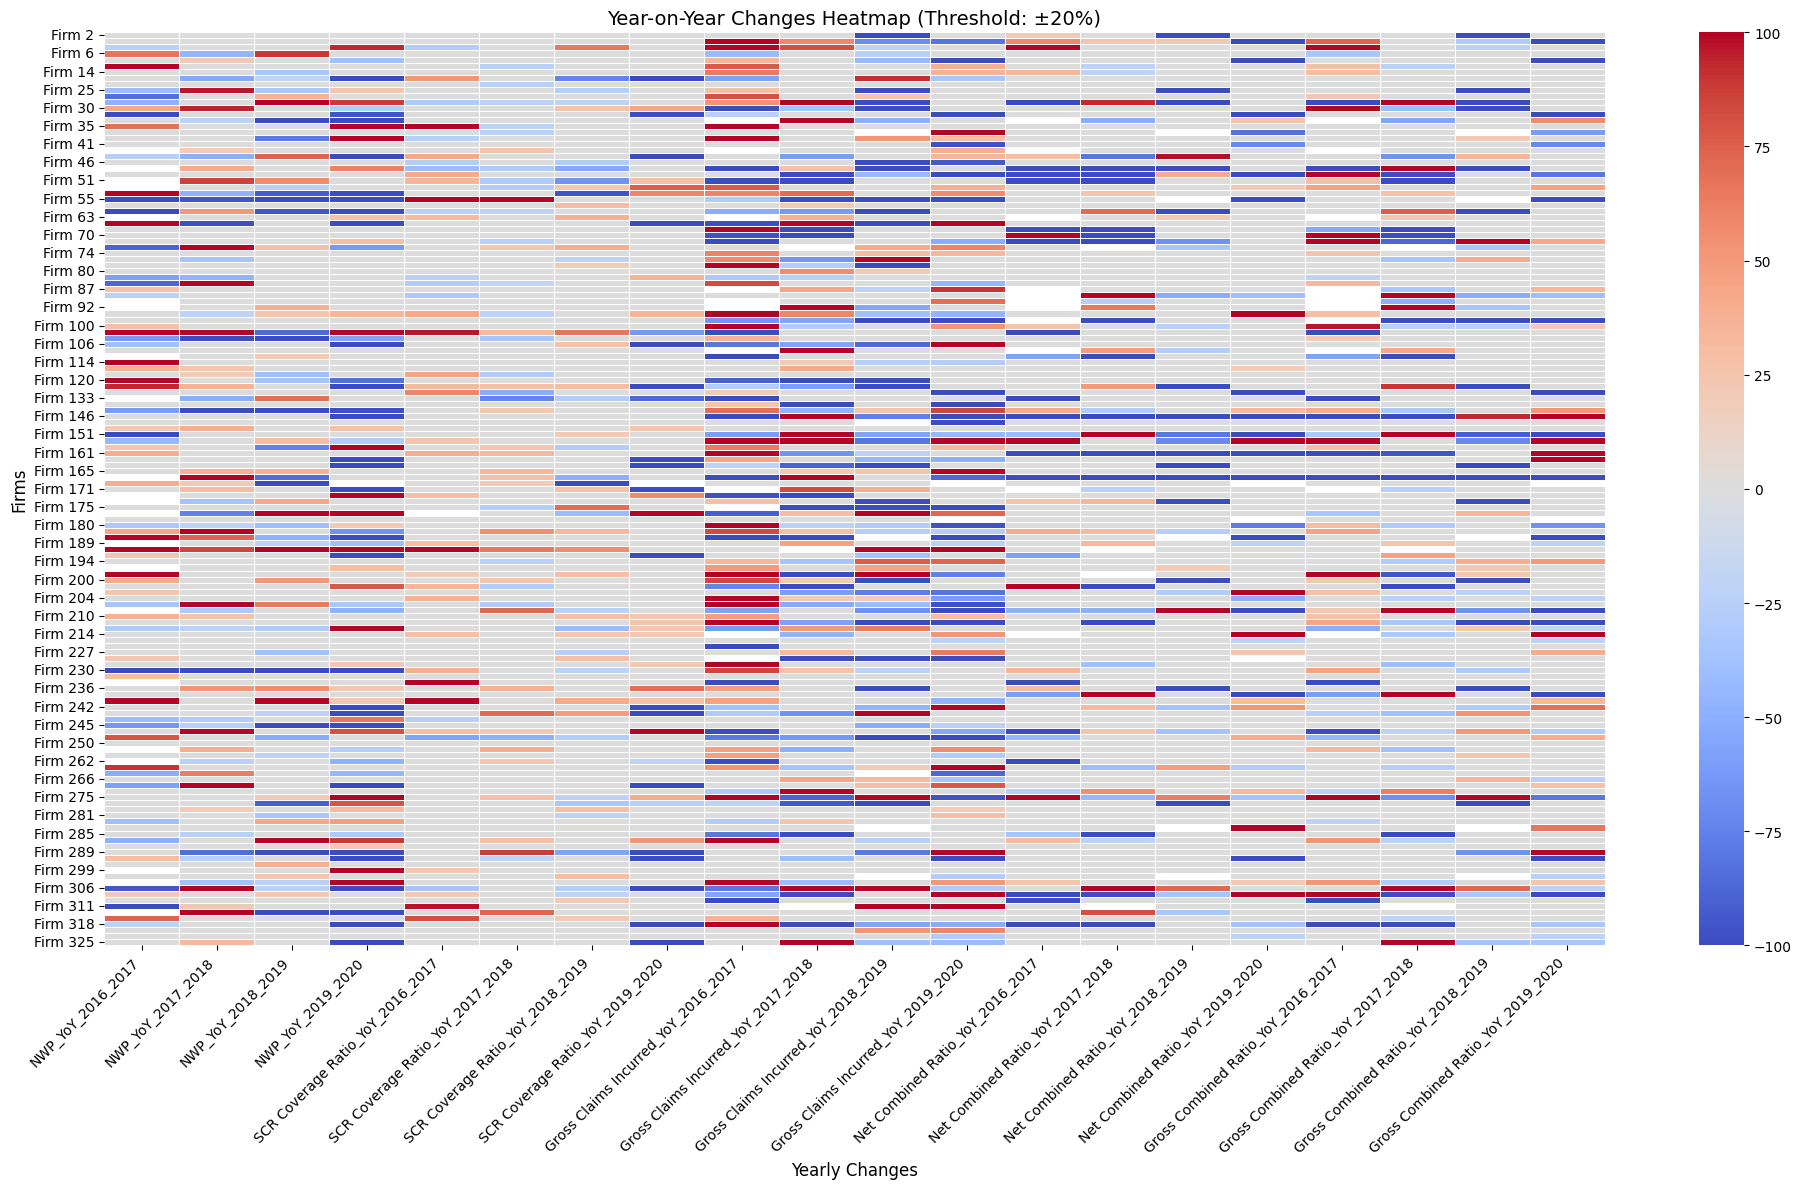

In [ ]:
# Step 1: Define the threshold for filtering
threshold = 20  # Adjust the threshold value as needed

# Step 2: Filter the YoY change columns for the heatmap
filtered_yoy_changes_df = df_with_yoy_changes.copy()

# Filter out the values that do not meet the threshold criteria
heatmap_columns = [col for col in df_with_yoy_changes.columns if 'YoY' in col]

for col in heatmap_columns:
    filtered_yoy_changes_df[col] = filtered_yoy_changes_df[col].apply(
        lambda x: x if abs(x) > threshold else 0  # Replace values with 0 if they are below the threshold
    )

# Step 3: Create the heatmap for the filtered data with improved readability
plt.figure(figsize=(20, 12))

# Create the heatmap without annotations
sns.heatmap(filtered_yoy_changes_df[heatmap_columns].set_index(filtered_yoy_changes_df['Firm']),
            cmap='coolwarm', annot=False, linewidths=.5, vmin=-100, vmax=100)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title(f'Year-on-Year Changes Heatmap (Threshold: ±{threshold}%)', fontsize=14)
plt.xlabel('Yearly Changes', fontsize=12)
plt.ylabel('Firms', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


1. Significant Fluctuations in Net Written Premiums (NWP):

* Firms 4, 25, and 75 exhibit large YoY increases followed by a decline in
their NWP, suggesting short-term market expansions or strategic adjustments that were not sustained.
* Firm 2 consistently experienced declining NWP, which could indicate competitive pressure or challenges in retaining its customer base.
* Firm 6 saw a sharp increase in NWP in 2017 followed by a volatile pattern, likely a result of either portfolio changes or market shocks. This indicates the firm may be navigating a turbulent market or restructuring its offerings.

2. Volatility in Gross Claims Incurred:

   
* Firms 5, 6, and 10 show significant volatility in Gross Claims Incurred, suggesting potential challenges in managing underwriting risk or exposure to large claims events.
   
* Firm 5 specifically shows wide swings from one year to the next, indicating a possible response to catastrophic events or erratic claims behavior, which could be impacting profitability.
   
* Firms 30 and 80 have relatively stable claims, indicating efficient risk management and possibly lower exposure to high-risk portfolios.

3. Strength in SCR Coverage Ratio (Capital Adequacy):


*   Firms 14 and 100 stand out for maintaining consistently high SCR coverage ratios (above 2x), which indicates a robust capital buffer and resilience against market downturns.

*   Firm 6 shows fluctuations in SCR coverage, dipping below industry standards in some years. This could point to potential capital strain or shifts in risk appetite that may need further investigation.

*   Firm 4 has a consistent SCR coverage ratio, reflecting strong capital adequacy despite fluctuations in premium growth, making it a financially stable performer.

4. Firms with Concerning Net Combined Ratios:


*   Firms 5, 10, and 25 demonstrate increasing Net Combined Ratios, with values exceeding 100%, highlighting potential profitability challenges. An increasing combined ratio often signifies higher claims or operational inefficiency, and may suggest these firms are struggling to maintain cost control.

*   On the contrary, Firms 6 and 10 have seen improvements in their Net Combined Ratios, suggesting they have managed to optimize operational efficiency and control claims costs over time.

5. Notable Outliers in Yearly Changes:


*   Firm 114 displays extreme YoY changes in multiple metrics, raising red flags that could suggest either data reporting inconsistencies or significant one-off events impacting the firm’s performance.

*   Firm 2 shows a pattern of consistent decreases in both NWP and SCR, possibly reflecting poor market positioning or aggressive competition leading to a shrinking customer base and reduced financial resilience.

6. Firms with Consistent Performance:


*   Firm 30 and Firm 80 have shown stable YoY changes across all key metrics, positioning them as consistent performers. Their balanced growth in NWP, manageable Gross Claims Incurred, and strong SCR coverage suggest these firms are effectively managing their capital, risks, and underwriting strategies.

*   Firm 50 has a solid SCR ratio and moderate growth in NWP, reflecting a well-balanced approach in managing capital adequacy and maintaining premium growth.

7. Impact of External Events on Claims:


*   Firms with sharp increases in Gross Claims Incurred, such as Firm 4 and Firm 25, could have been impacted by external events such as natural disasters or other high-severity claims events. These firms may need to reassess their risk management practices and diversify portfolios to mitigate future volatility.

8. Strategic Shifts in NWP Trends:


*   Firms 75 and 80 display sharp increases in NWP followed by stabilization, suggesting successful market penetration and subsequent consolidation of their market share. Their ability to sustain these growth levels while maintaining solid SCR coverage positions them as strong players in the market.

*   In contrast, Firm 2 shows a continuous decline in NWP without corresponding improvement in other metrics, indicating potential strategic misalignment or competitive losses.

9. Performance of Top Firms:


*   Firms 80, 100, and 30 are top performers with balanced growth in premiums, stable SCR coverage, and improving Net Combined Ratios. These firms showcase strong capital management and efficient operations, making them market leaders in terms of financial stability and profitability.



##Forecasting the firms based on important metrics for year 2021

In [ ]:
# Function to apply time series analysis on a given metric for each firm and return a dataframe with predictions
def apply_time_series(df, firm_col, metric_cols, metric_name):
    firm_time_series = {}
    forecasts_list = []  # List to store forecasted values for each firm

    # Loop through each firm and apply time series forecasting
    for firm in df[firm_col].unique():
        # Extract time series data for the firm
        firm_data = df[df[firm_col] == firm][metric_cols].T
        firm_data.columns = ['Values']

        # Convert the years into datetime without freq
        firm_data.index = pd.to_datetime([f"{year}-01-01" for year in range(2016, 2021)])

        # Assign frequency to the index (Year Start frequency)
        firm_data.index.freq = 'AS-JAN'

        # Apply Exponential Smoothing (without seasonality)
        model = ExponentialSmoothing(firm_data['Values'], trend='add', seasonal=None)
        model_fit = model.fit()

        # Forecast for the next period (2021)
        forecast = model_fit.forecast(1)  # Forecasting for 1 period ahead (2021)

        # Append the firm and its forecasted value to the list using .iloc[0]
        forecasts_list.append({
            'Firm': firm,
            f'Forecast_{metric_name}_2021': forecast.iloc[0]  # Use .iloc[0] to avoid FutureWarning
        })

    # Create a DataFrame from the forecasted values
    forecast_df = pd.DataFrame(forecasts_list)

    return forecast_df

# Define the metrics you want to analyze
metrics_columns = {
    'NWP': ['NWP_2016', 'NWP_2017', 'NWP_2018', 'NWP_2019', 'NWP_2020'],
    'SCR Coverage Ratio': ['SCR_2016', 'SCR_2017', 'SCR_2018', 'SCR_2019', 'SCR_2020'],
    'Gross Claims Incurred': ['Gross_claims_incurred_2016', 'Gross_claims_incurred_2017', 'Gross_claims_incurred_2018', 'Gross_claims_incurred_2019', 'Gross_claims_incurred_2020'],
    'Net Combined Ratio': ['Net_combined_ratio_2016', 'Net_combined_ratio_2017', 'Net_combined_ratio_2018', 'Net_combined_ratio_2019', 'Net_combined_ratio_2020'],
    'Gross Combined Ratio': ['Gross_combined_ratio_2016', 'Gross_combined_ratio_2017', 'Gross_combined_ratio_2018', 'Gross_combined_ratio_2019', 'Gross_combined_ratio_2020'],
}

# Initialize an empty dataframe for the first merge
combined_forecast_df = pd.DataFrame()

# Apply time series analysis for each metric and combine the results
for metric_name, columns in metrics_columns.items():
    metric_forecast_df = apply_time_series(df_final_filtered, 'Firm', columns, metric_name)

    # Handle the case where the combined_forecast_df is empty (initial case)
    if combined_forecast_df.empty:
        combined_forecast_df = metric_forecast_df
    else:
        combined_forecast_df = pd.merge(combined_forecast_df, metric_forecast_df, on='Firm', how='outer')

# Display the dataframe with all forecasted values
combined_forecast_df


Firm  Forecast_NWP_2021  Forecast_SCR Coverage Ratio_2021  \
0      Firm 2          20.043228                          6.502684   
1      Firm 4       24479.293230                      20743.949217   
2      Firm 5         120.538748                         76.690544   
3      Firm 6        3321.297798                       3504.462841   
4      Firm 9          10.701874                          9.039813   
..        ...                ...                               ...   
146  Firm 317        2185.299116                        200.786436   
147  Firm 318          93.051465                         68.172839   
148  Firm 322        2034.447494                       1233.462886   
149  Firm 324          27.365816                         30.427160   
150  Firm 325        -291.585221                       -240.295888   

     Forecast_Gross Claims Incurred_2021  Forecast_Net Combined Ratio_2021  \
0                             -13.490803                         -0.309120   
1                              32.677844                         -1.612597   
2                             529.404401                          0.815167   
3                              97.959181                          0.778627   
4                            -104.973286                          0.273783   
..                                   ...                               ...   
146                           195.634619                          0.977412   
147                             4.927680                          2.816426   
148                           197.471574                          0.918486   
149                             5.692803                          0.792329   
150                             2.365368                          0.000000   

     Forecast_Gross Combined Ratio_2021  
0                             -0.302970  
1                            -22.680990  
2                              1.011090  
3                              0.581855  
4                             -0.890992  
..                                  ...  
146                            0.875439  
147                            1.755678  
148                            1.000600  
149                            0.792329  
150                            0.283084  

[151 rows x 6 columns]

##Final Conclusion: Top Firms Requiring Resource Supervision

Based on the analysis of historical metrics such as the Net Written Premium (NWP), Gross Written Premium (GWP), SCR (Solvency Capital Requirement), and Gross Claims Incurred from 2016-2020, combined with significant year-on-year changes and critical risk factors (e.g., high combined ratios, low SCR coverage, and elevated claims), we have identified the following top firms that require close monitoring and resource supervision.

In [ ]:
# Get the unique firm lists from each category
firms_top_10 = set(df_top_10['Firm'].unique())
firms_significant_changes = set(df_with_yoy_changes['Firm'].unique())
firms_outliers = set(outlier_summary['Firm'].unique())
firms_high_risk = set(high_risk_firms['Firm'].unique())

# Get the intersection of these sets
final_firms = firms_top_10 & firms_significant_changes & firms_outliers & firms_high_risk

# Print or return the final list of firms
print("Final Firms that need resource allocation for supervision based on Size, Year-on-Year Changes, Outliers, and Risk:")
print(final_firms)

# Filter the forecasted data for these final firms
forecasted_data_final_firms = combined_forecast_df[combined_forecast_df['Firm'].isin(final_firms)]

# Display the forecasted data for the final firms
print("Forecasted Data for Final Firms:")
forecasted_data_final_firms


Final Firms that need resource allocation for supervision based on Size, Year-on-Year Changes, Outliers, and Risk:
{'Firm 22', 'Firm 280', 'Firm 210', 'Firm 25', 'Firm 183', 'Firm 199', 'Firm 165', 'Firm 275', 'Firm 105', 'Firm 6', 'Firm 158', 'Firm 163', 'Firm 200', 'Firm 283', 'Firm 243', 'Firm 297', 'Firm 74', 'Firm 286', 'Firm 5', 'Firm 49', 'Firm 81', 'Firm 52', 'Firm 304', 'Firm 17', 'Firm 305', 'Firm 272', 'Firm 196', 'Firm 234'}
Forecasted Data for Final Firms:


Firm  Forecast_NWP_2021  Forecast_SCR Coverage Ratio_2021  \
2      Firm 5         120.538748                         76.690544   
3      Firm 6        3321.297798                       3504.462841   
7     Firm 17        -722.599234                        -32.943079   
8     Firm 22          19.422030                         86.904982   
9     Firm 25        4457.952802                          3.785378   
23    Firm 49           4.232736                          4.113505   
25    Firm 52          13.084694                          7.989358   
36    Firm 74         235.282023                        243.967294   
40    Firm 81           0.070018                          1.235017   
50   Firm 105        2974.582663                       8818.306265   
68   Firm 158         368.954944                        241.430656   
70   Firm 163           0.030004                         -0.338962   
72   Firm 165         347.446893                        147.899993   
82   Firm 183           0.003316                         56.171149   
88   Firm 196          10.457305                          9.737763   
89   Firm 199       10773.054047                       3413.937254   
90   Firm 200           6.742167                          3.966117   
96   Firm 210       39293.570816                        494.414951   
106  Firm 234        2670.292251                       1647.087742   
112  Firm 243         -21.902749                         36.674742   
124  Firm 272        -276.430867                        300.594305   
126  Firm 275         216.314058                        172.704226   
128  Firm 280         100.625595                        146.491178   
130  Firm 283          16.337962                         83.264276   
133  Firm 286         351.841765                        251.758769   
137  Firm 297          13.712203                         10.347120   
139  Firm 304          18.771899                         11.821731   
140  Firm 305        1398.437107                         43.676266   

     Forecast_Gross Claims Incurred_2021  Forecast_Net Combined Ratio_2021  \
2                             529.404401                          0.815167   
3                              97.959181                          0.778627   
7                            2475.332376                          0.931283   
8                            1351.944883                          0.951172   
9                            -591.630732                         -0.276786   
23                            616.199949                          1.518130   
25                           1966.983770                          1.263290   
36                           1584.366358                          1.065550   
40                            501.427705                          0.937442   
50                           2080.130800                          1.038224   
68                           1253.182334                          1.044830   
70                            -49.387730                          1.018131   
72                           1082.417175                          1.390096   
82                             84.977608                          1.371005   
88                            307.325786                          1.239496   
89                            267.494204                          1.398346   
90                           -705.621764                         -0.349736   
96                            557.043746                          1.024693   
106                          1266.449239                          0.875919   
112                            82.992339                          0.839919   
124                           661.033589                          1.126066   
126                            77.020673                          0.961878   
128                          1034.695266                          1.067823   
130                          1494.831145                          0.875858   
133                         

##Forecasted data for firms that needs supervision

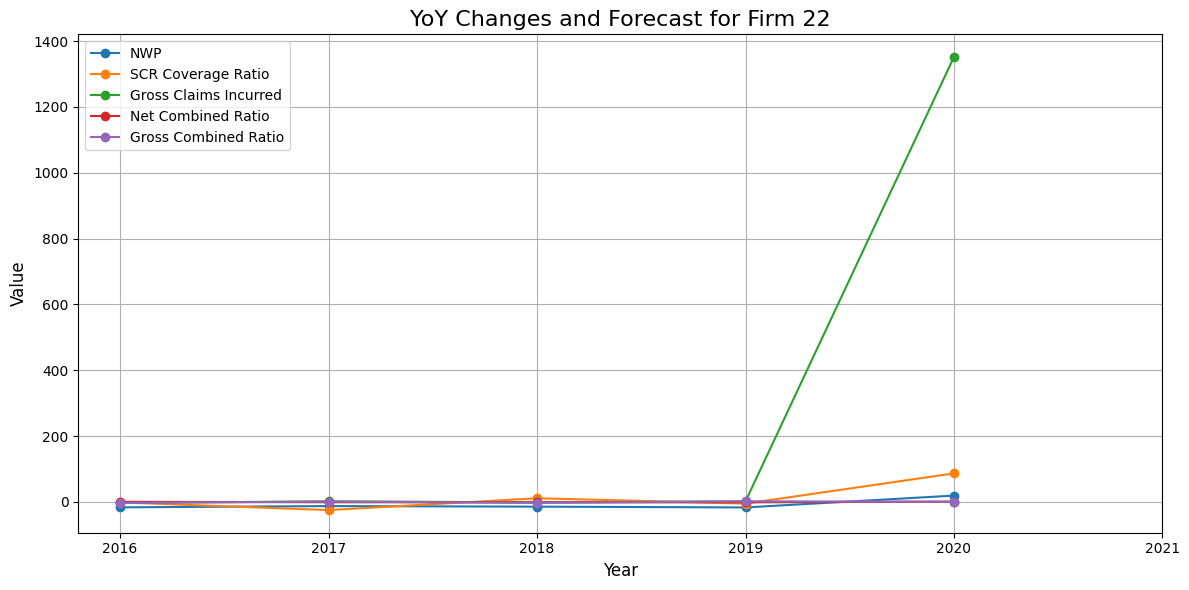

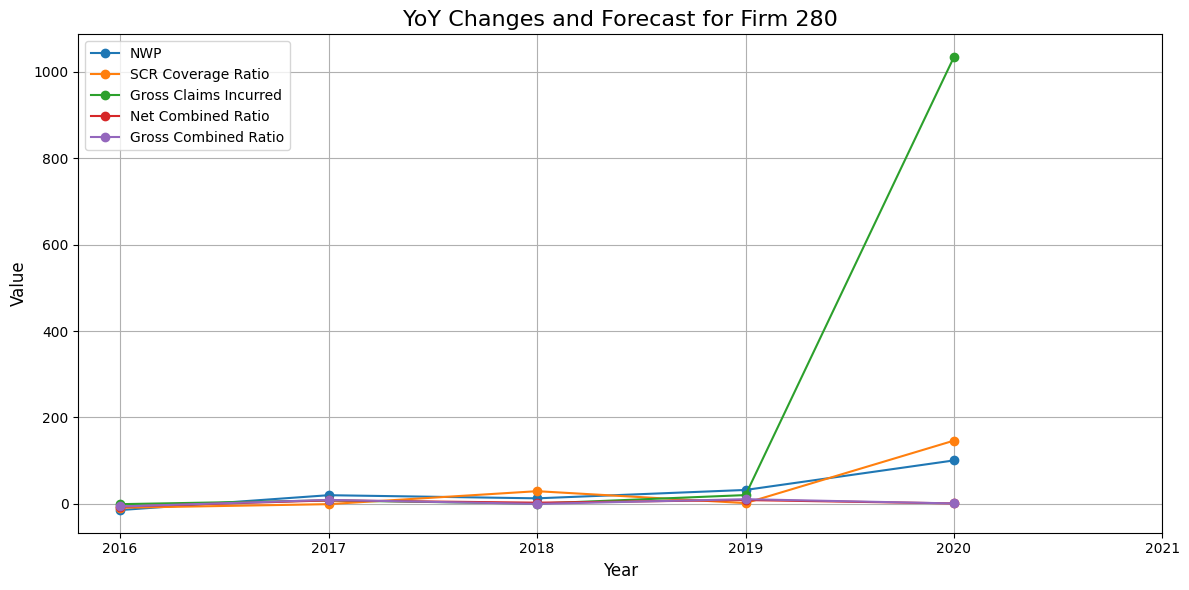

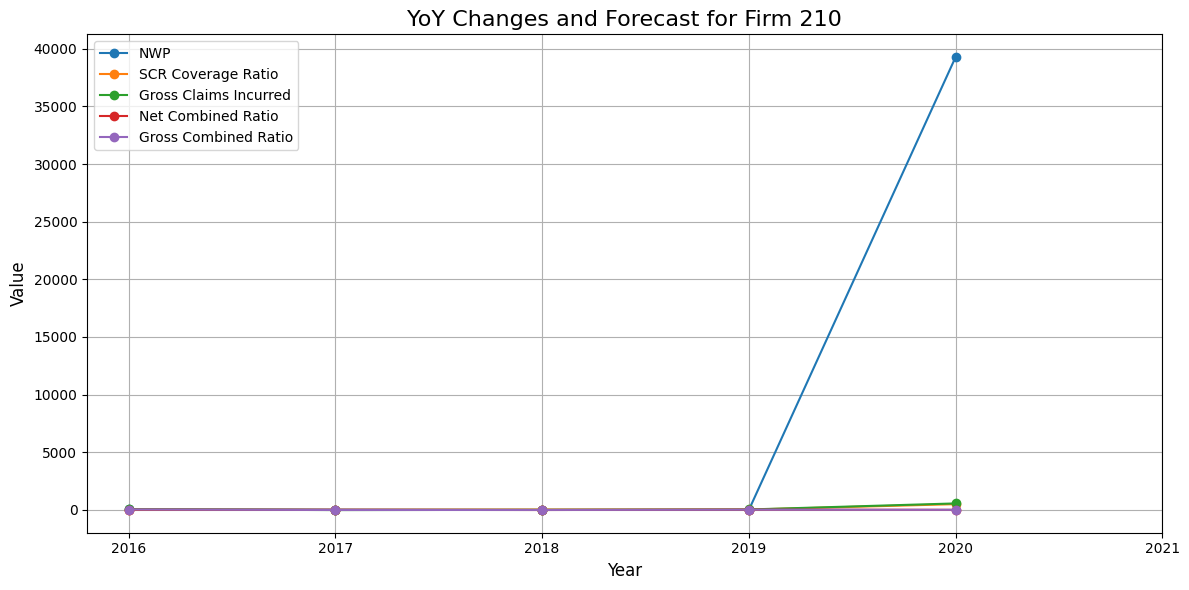

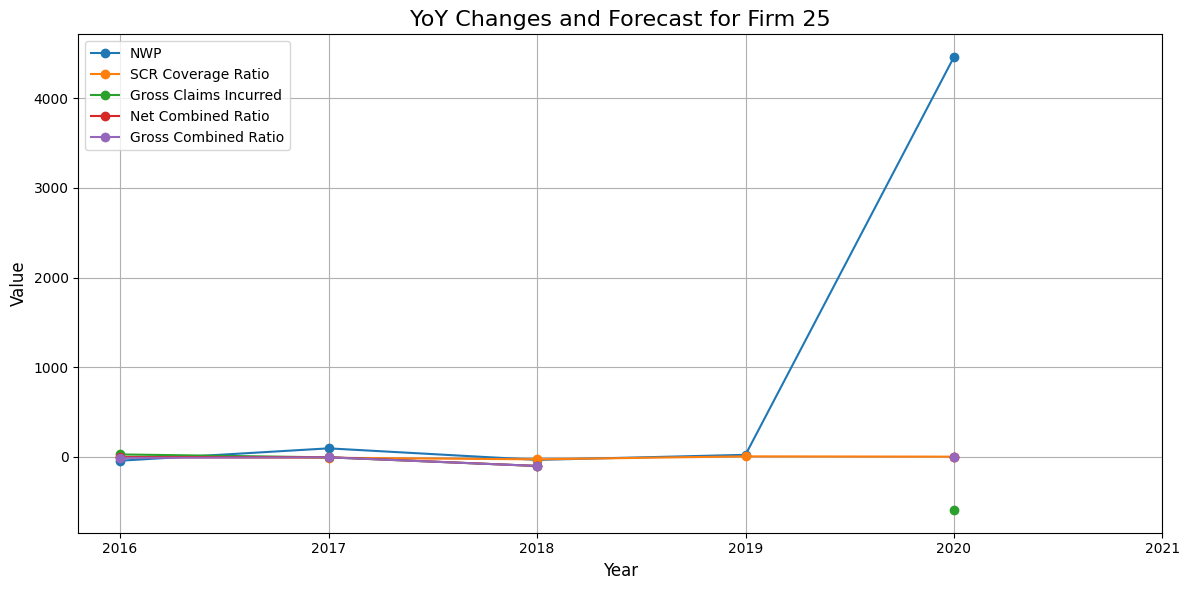

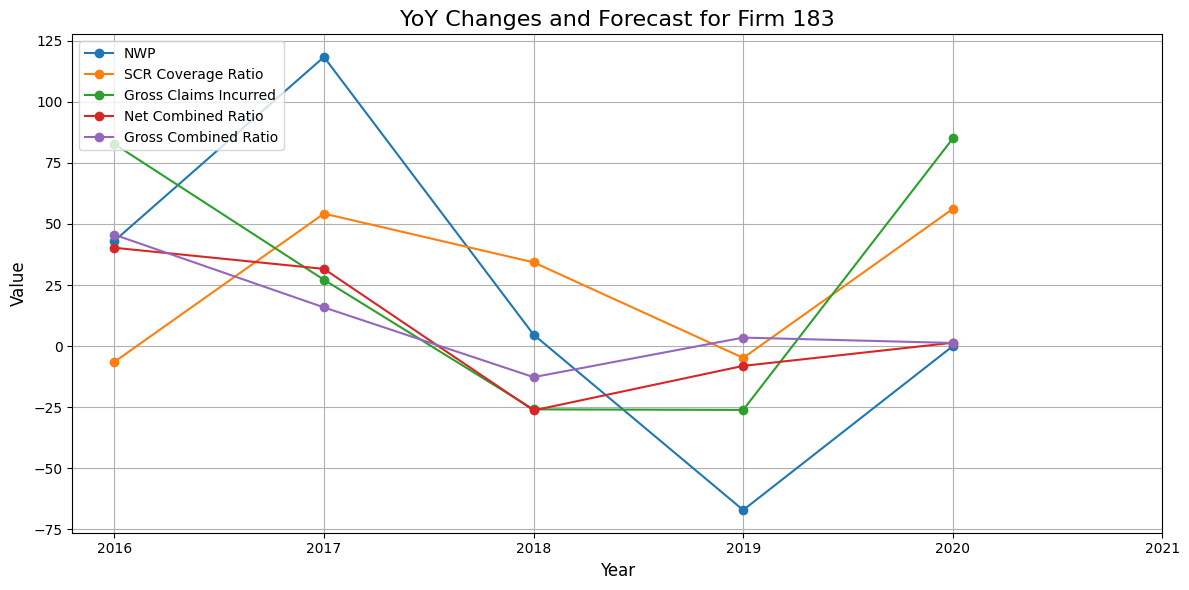

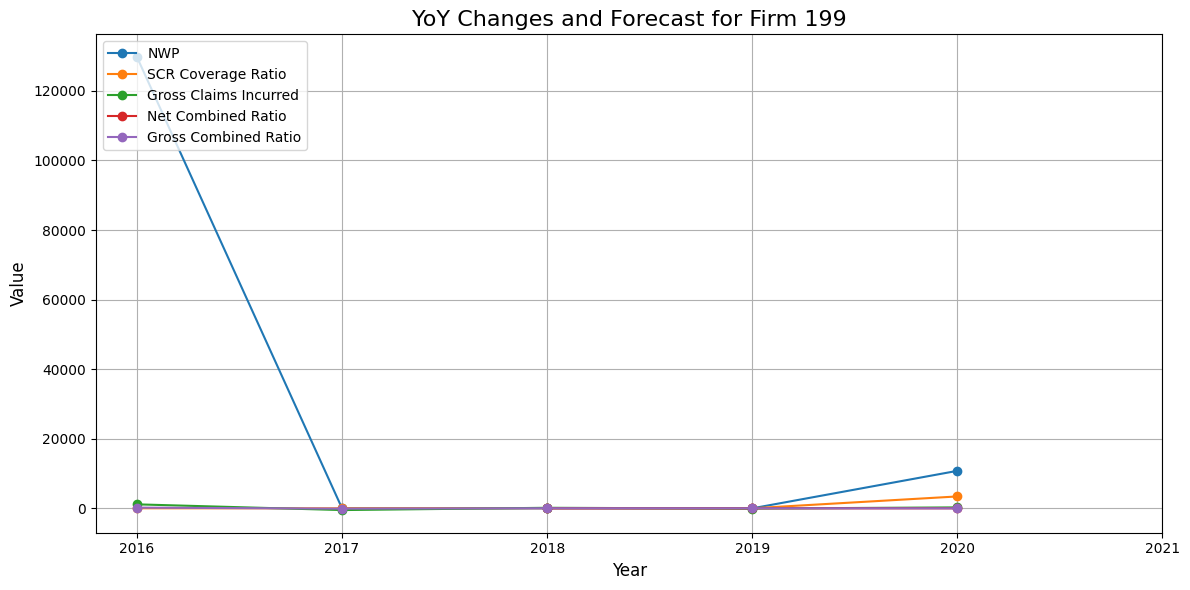

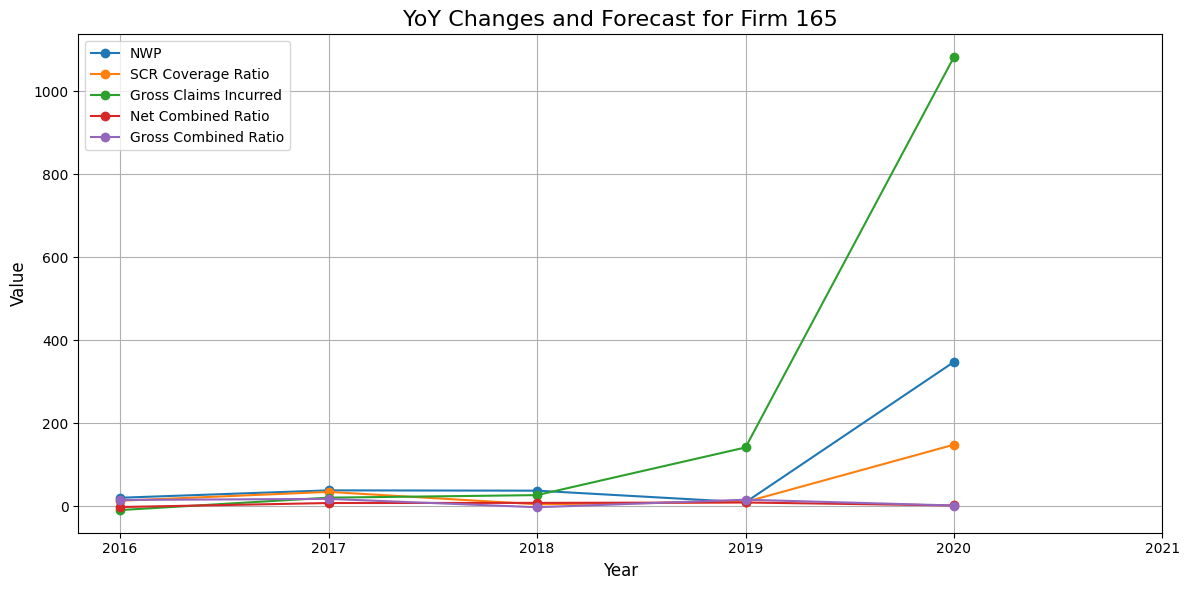

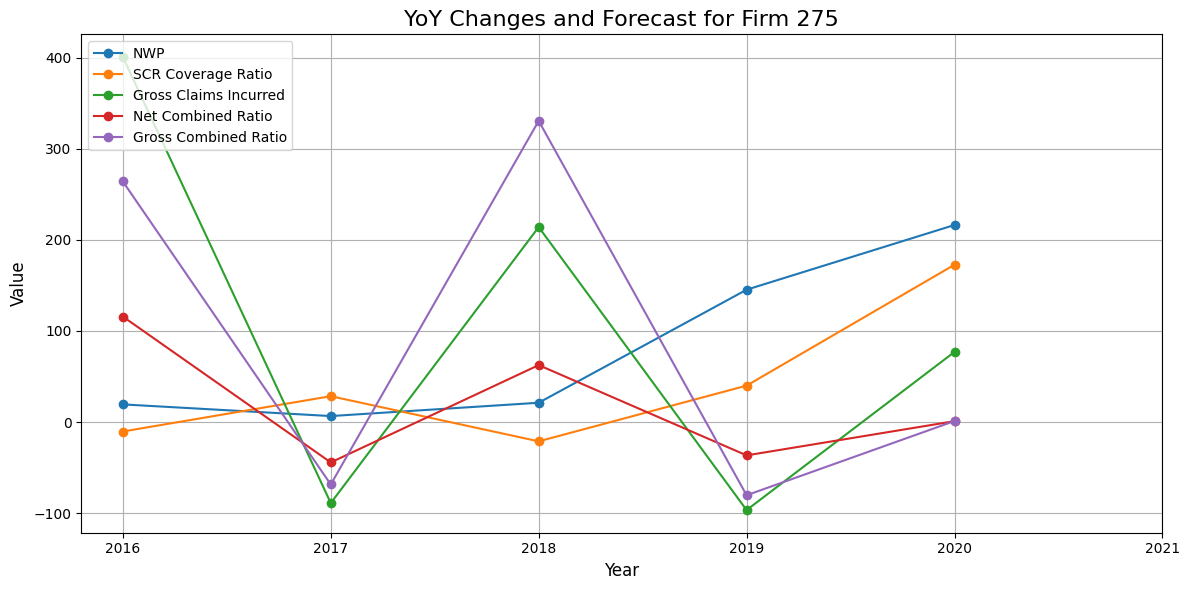

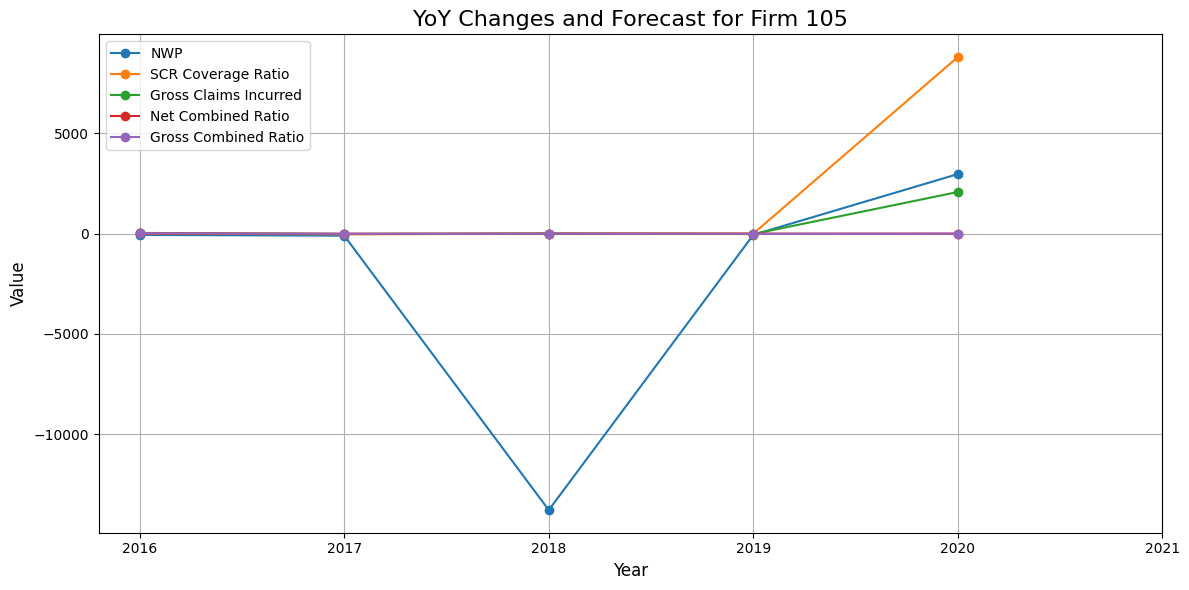

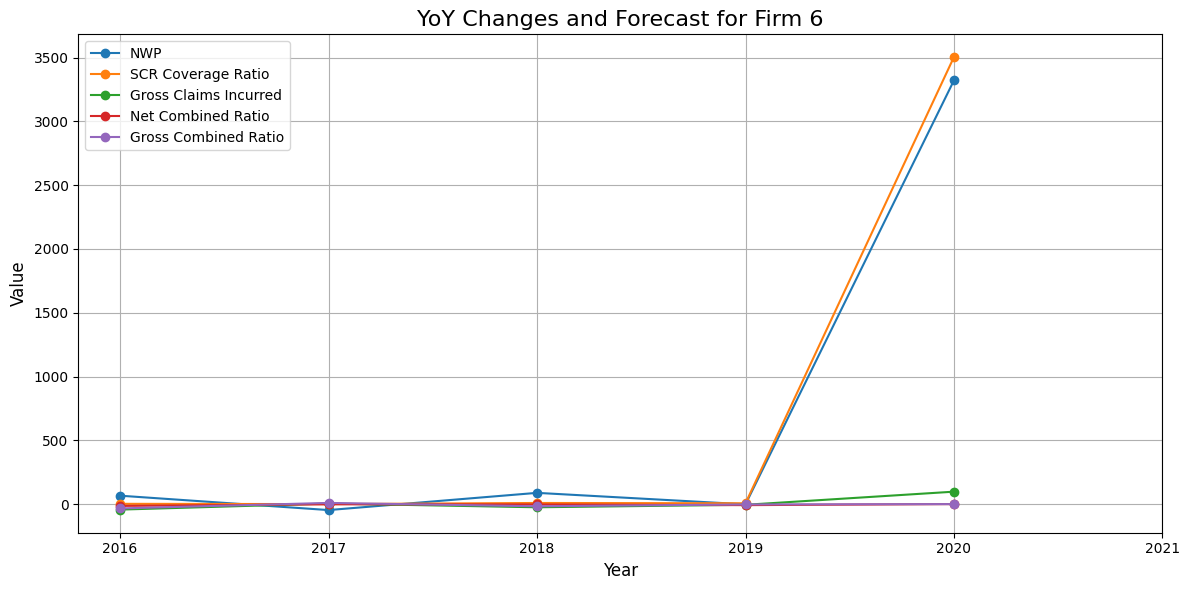

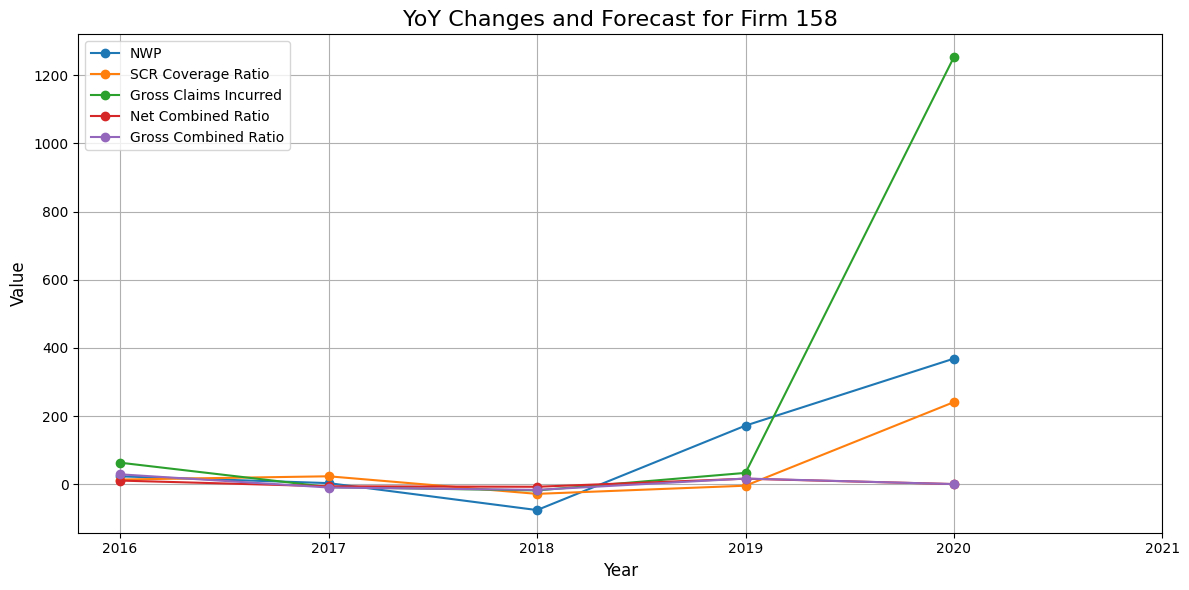

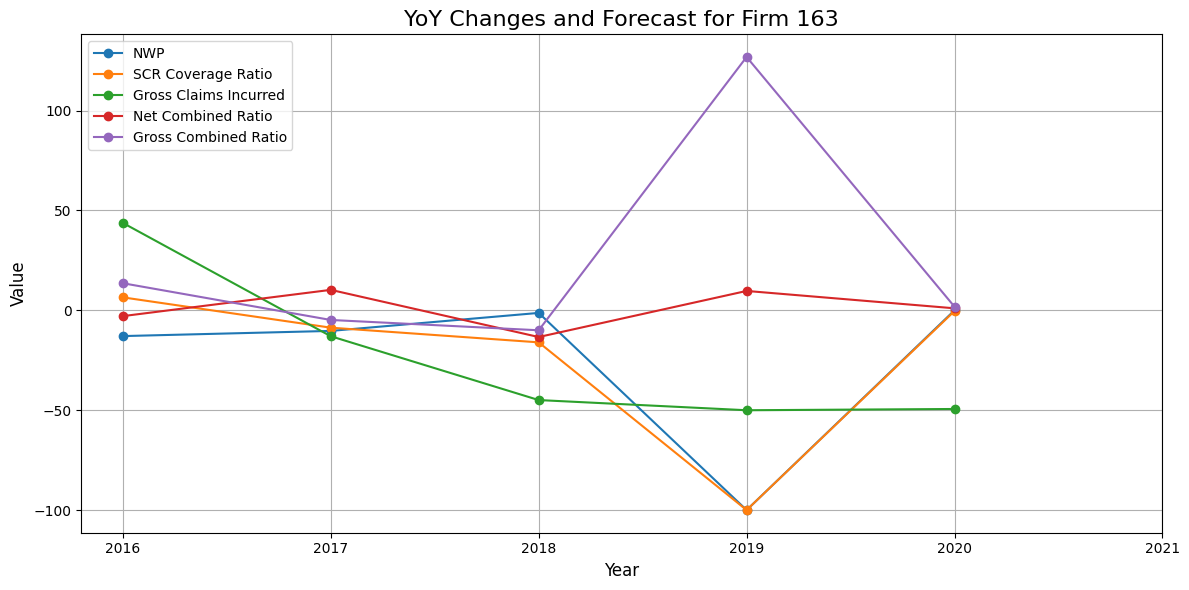

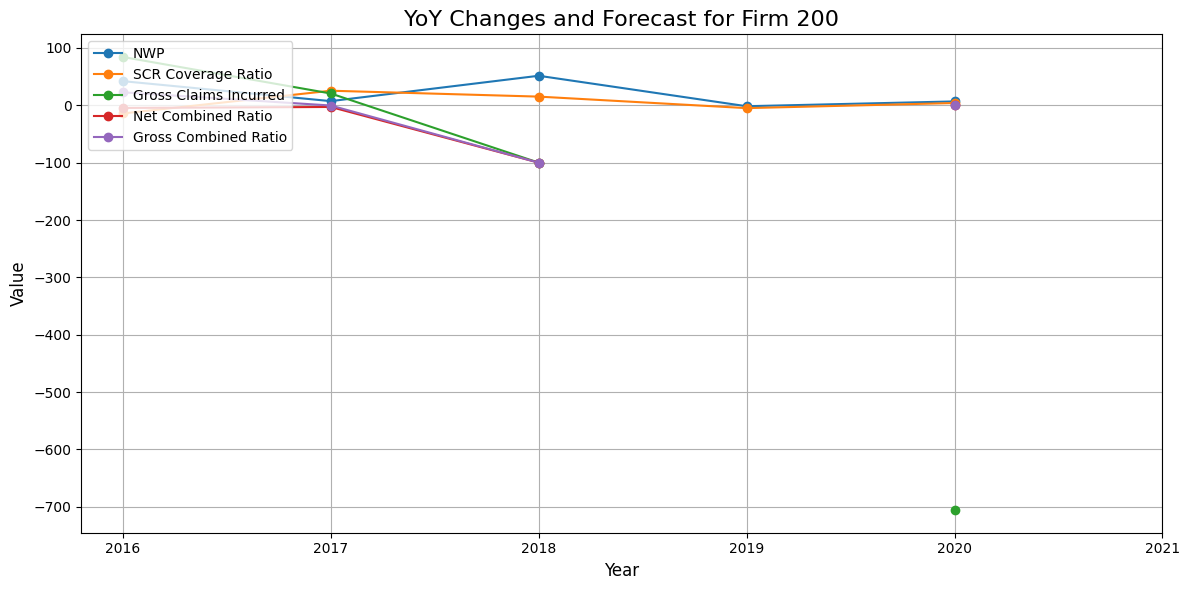

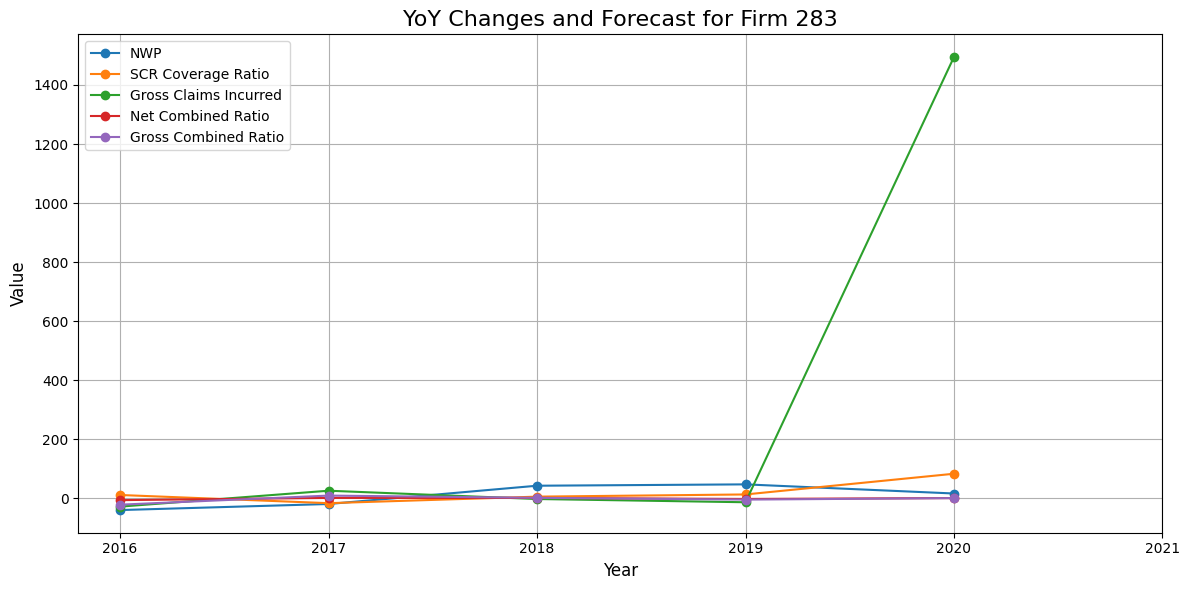

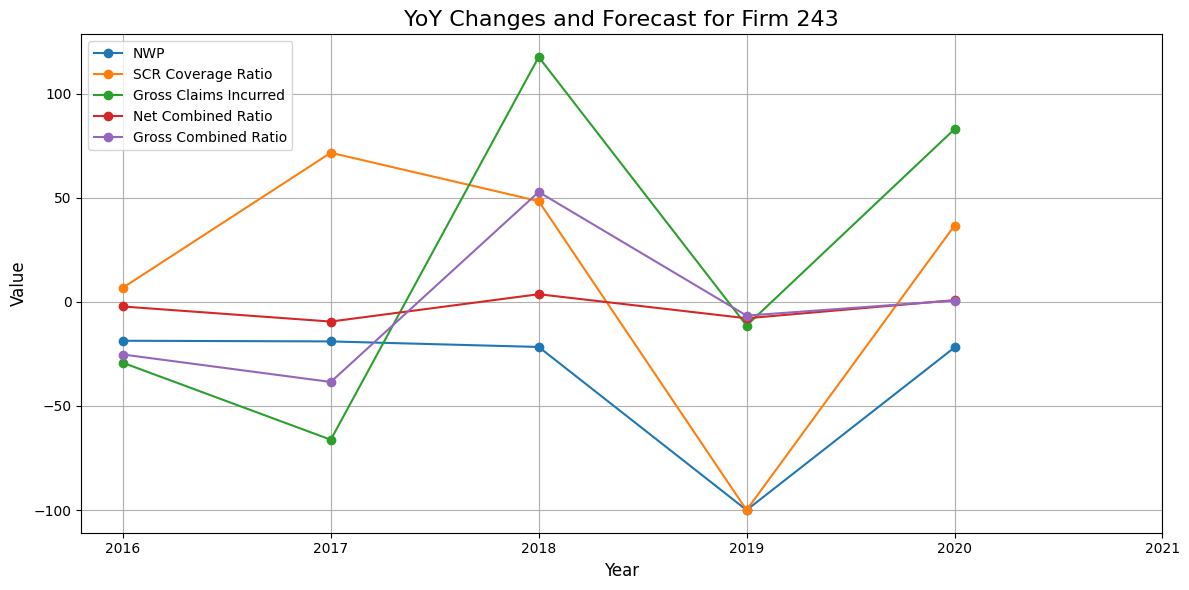

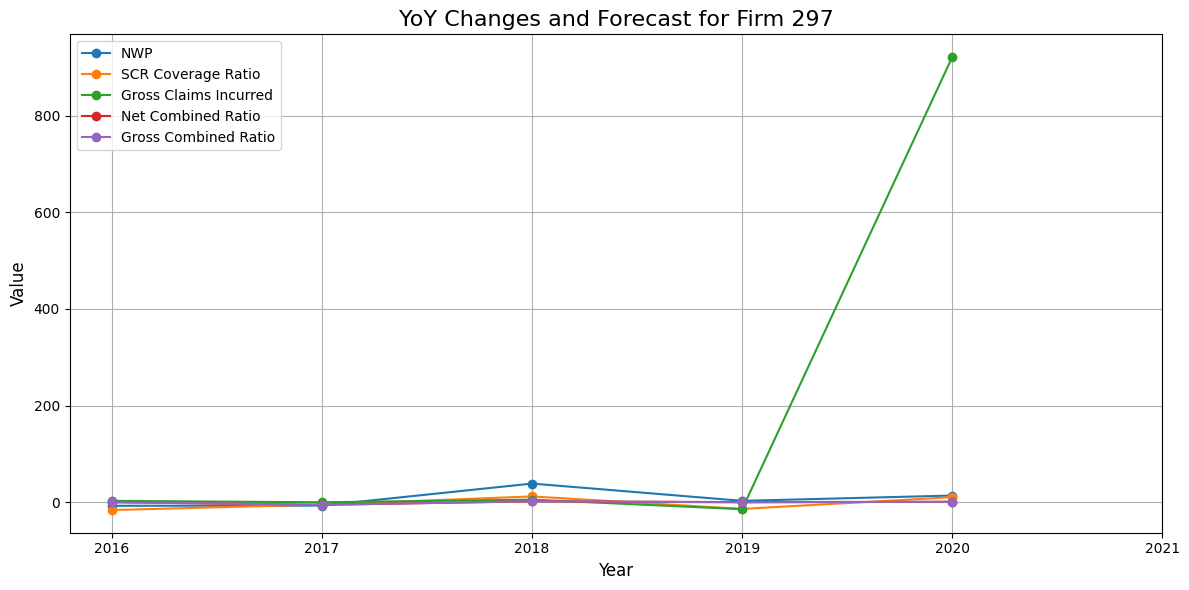

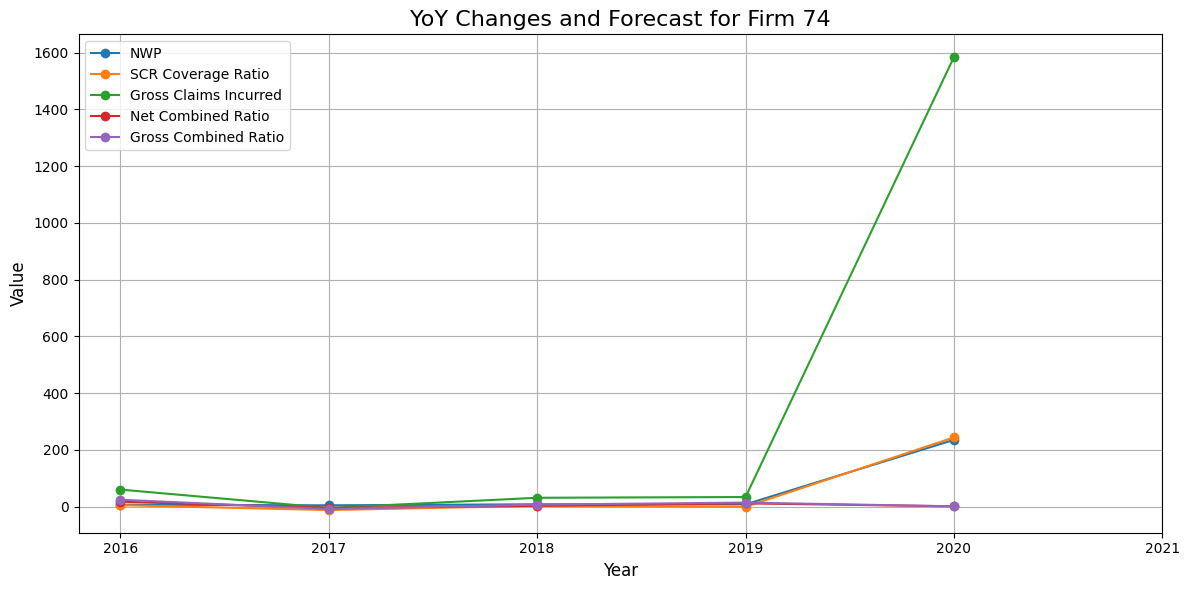

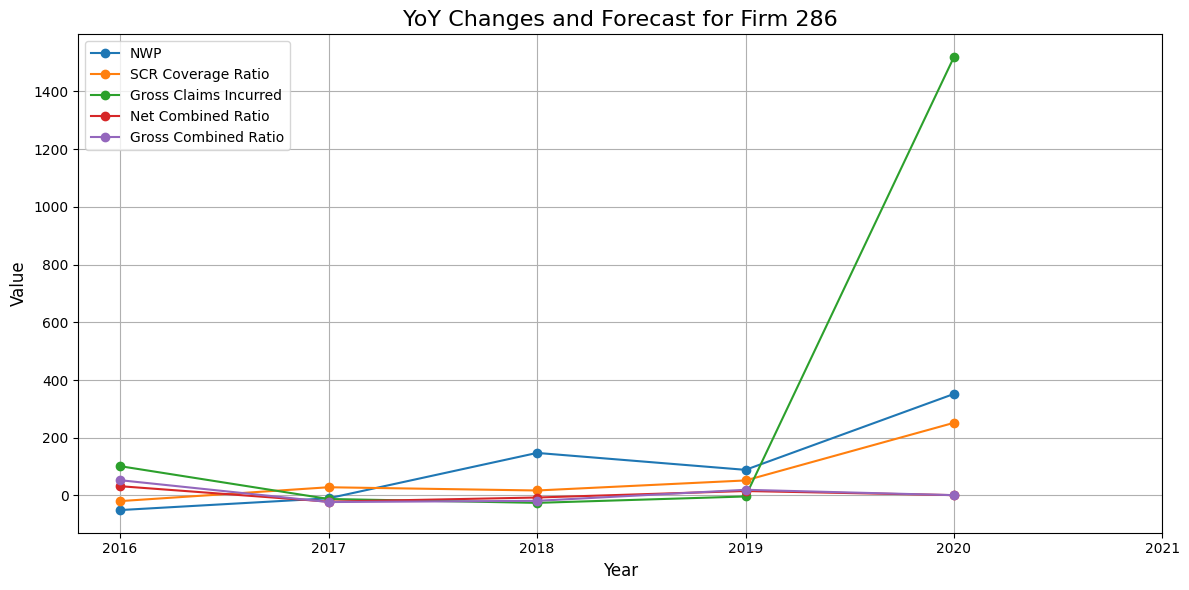

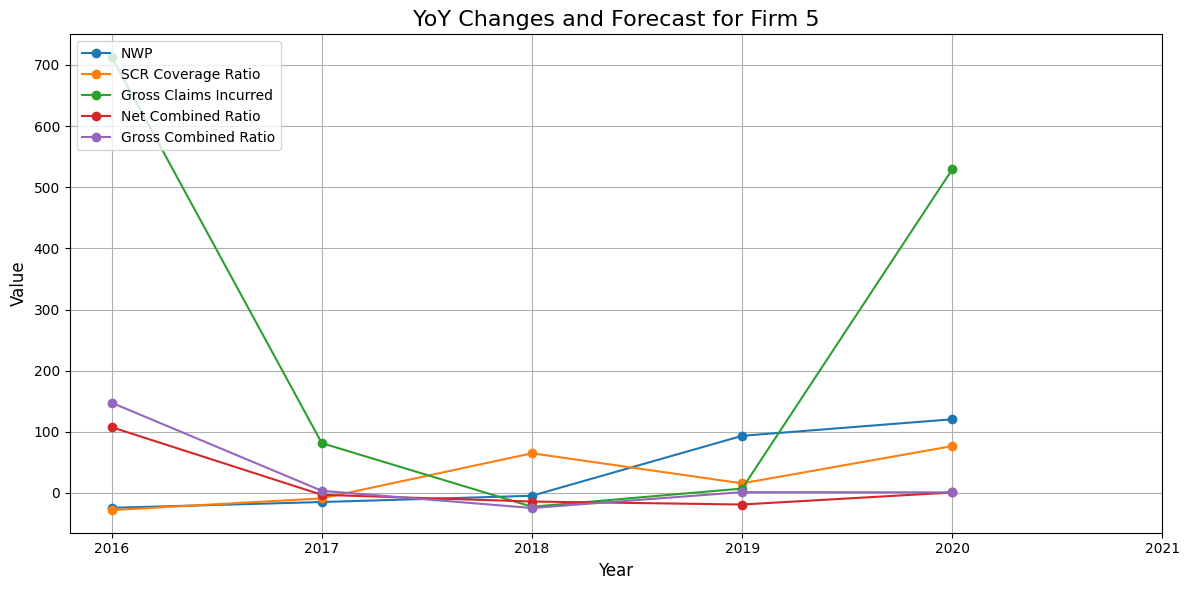

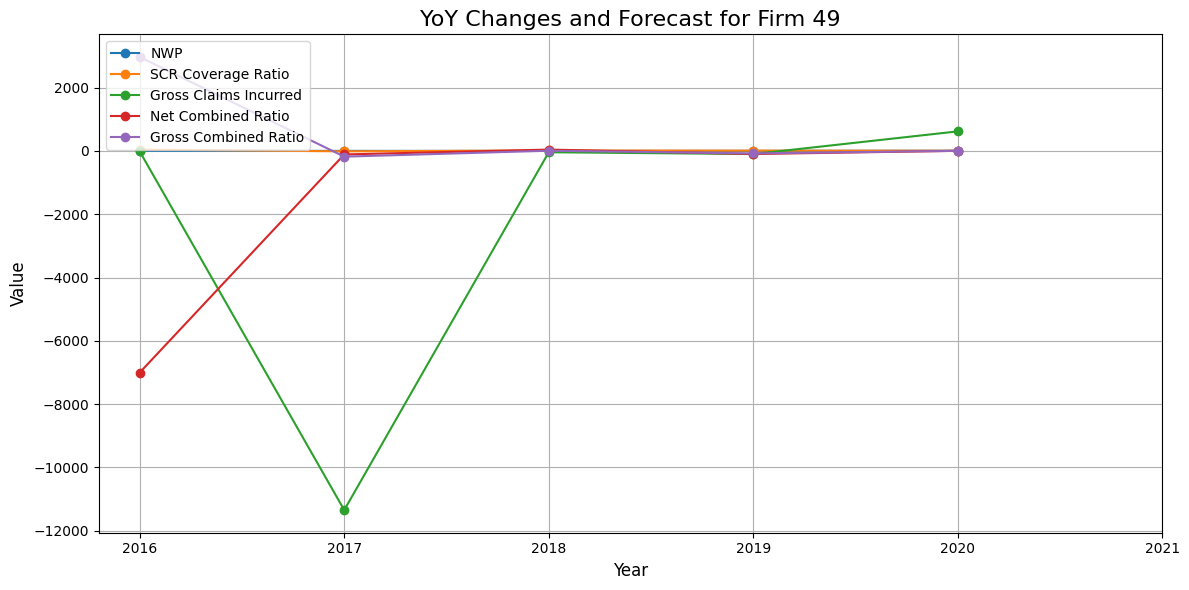

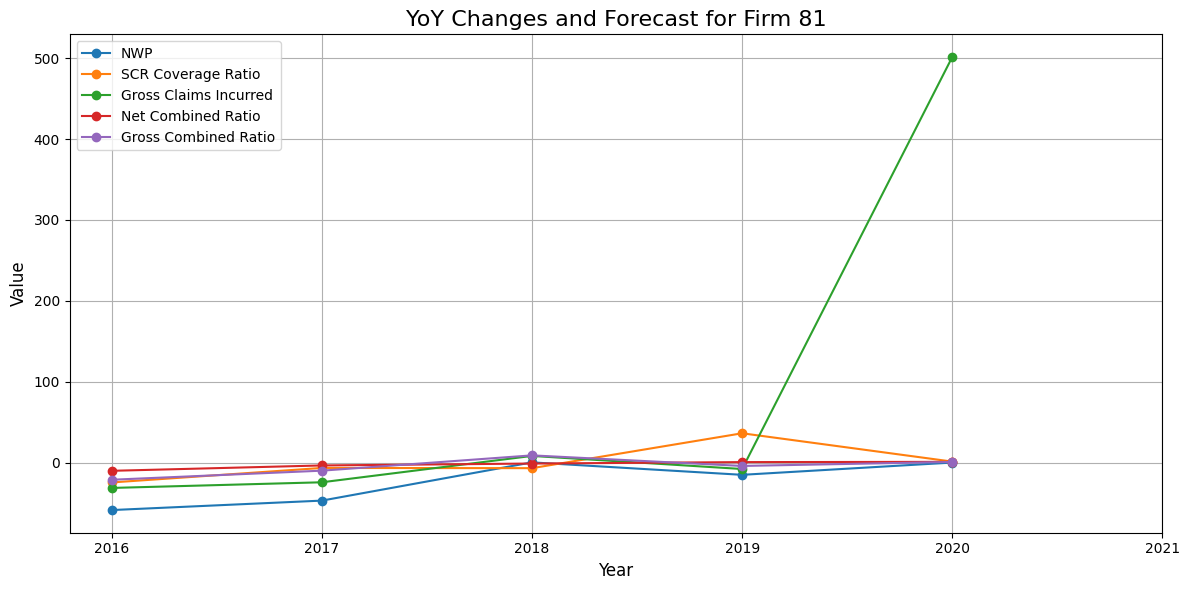

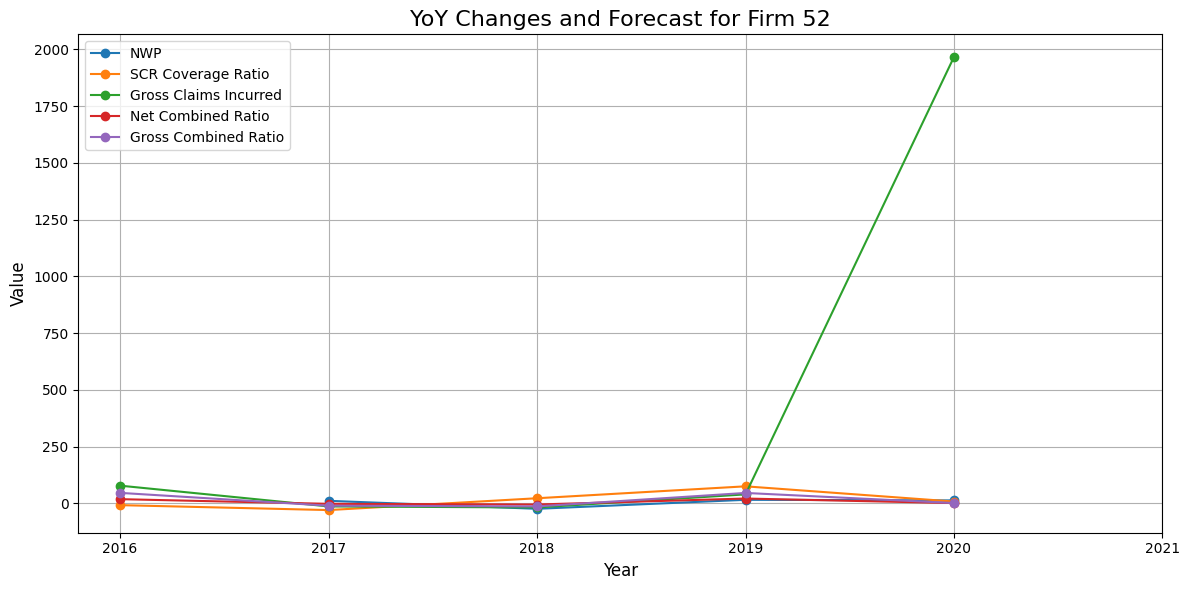

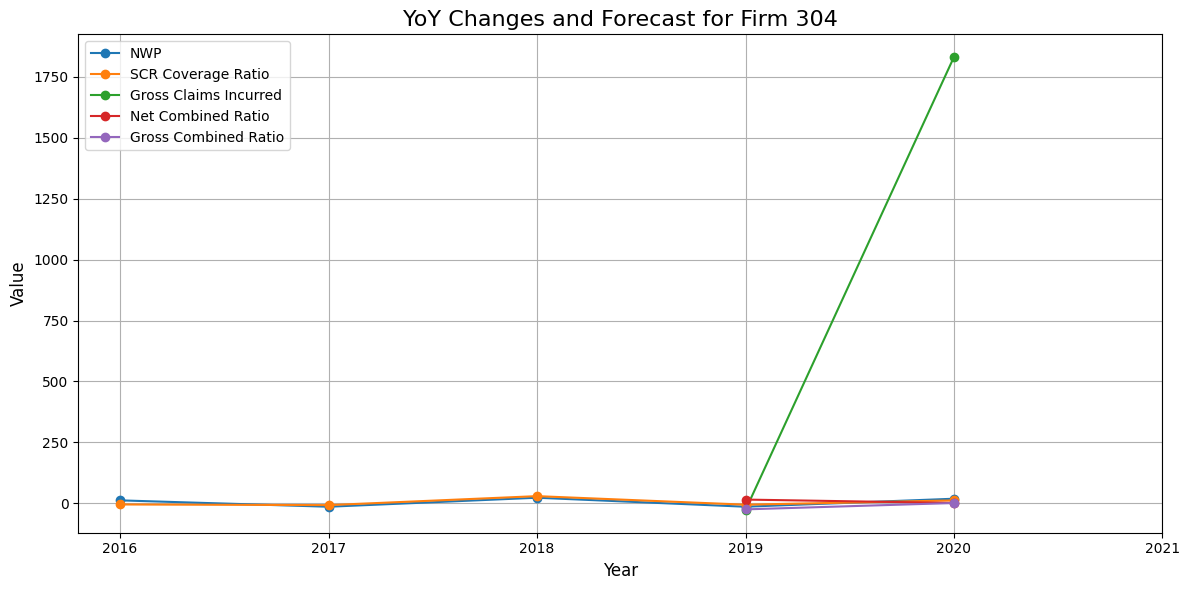

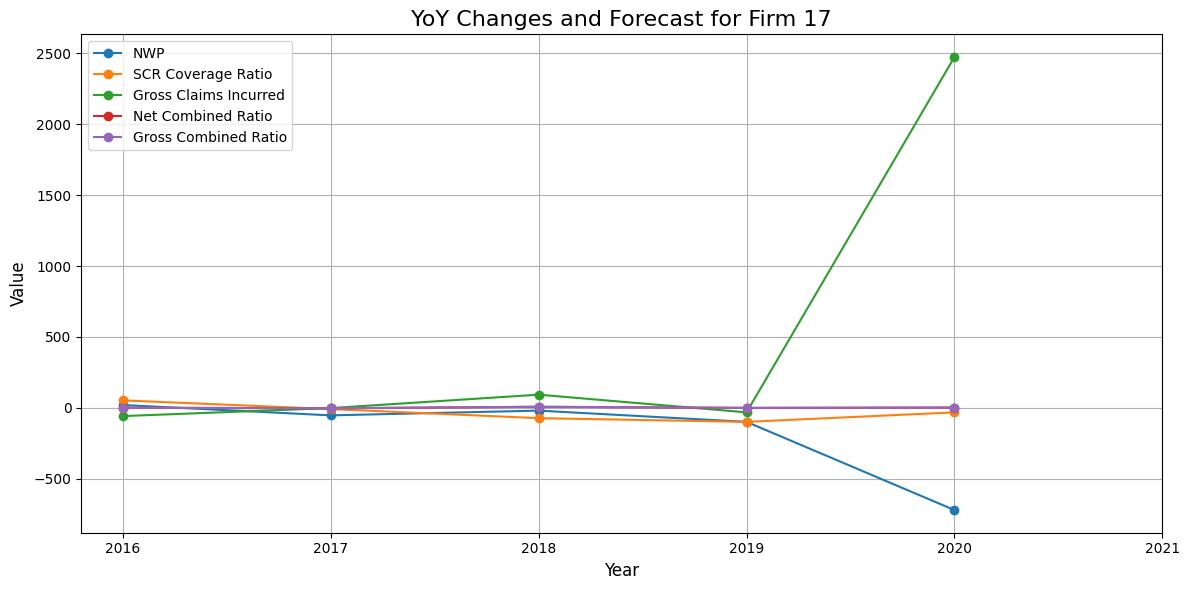

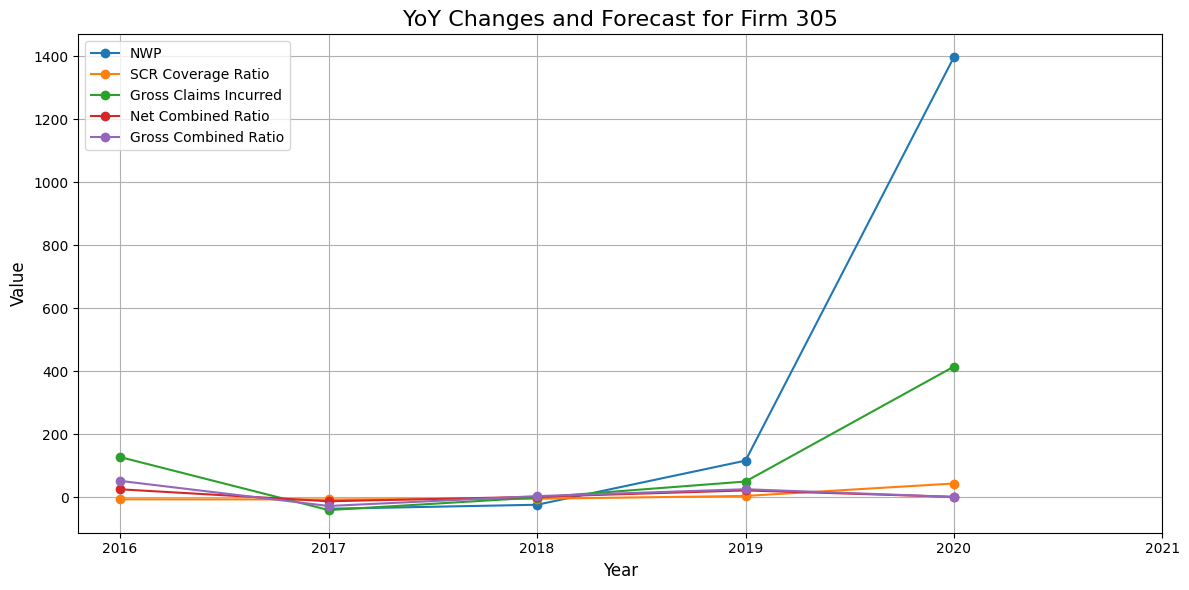

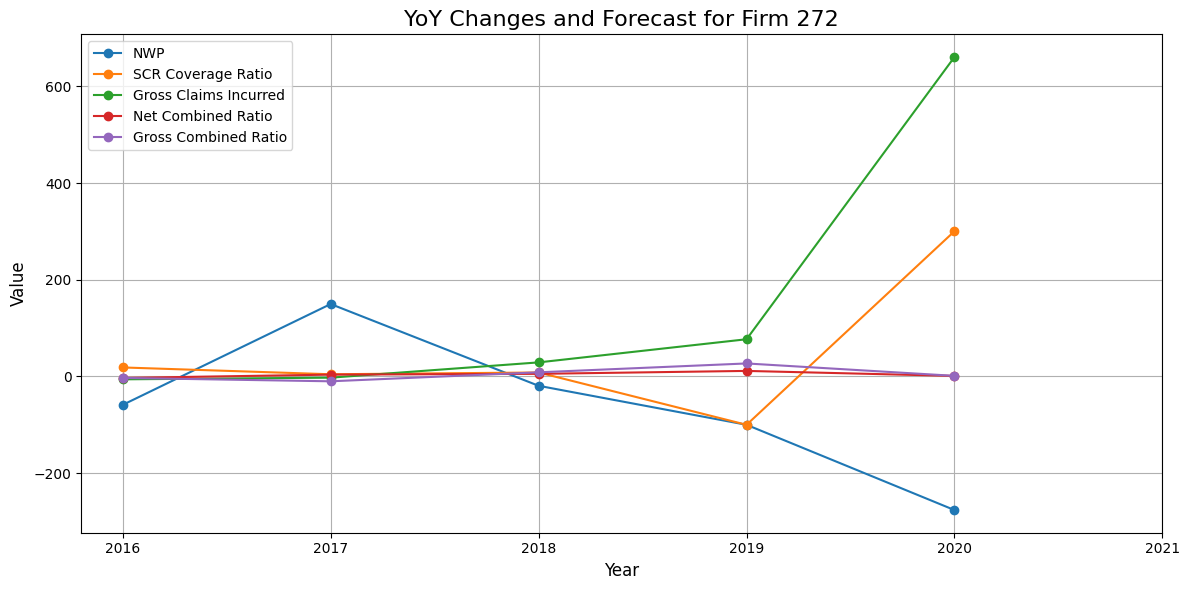

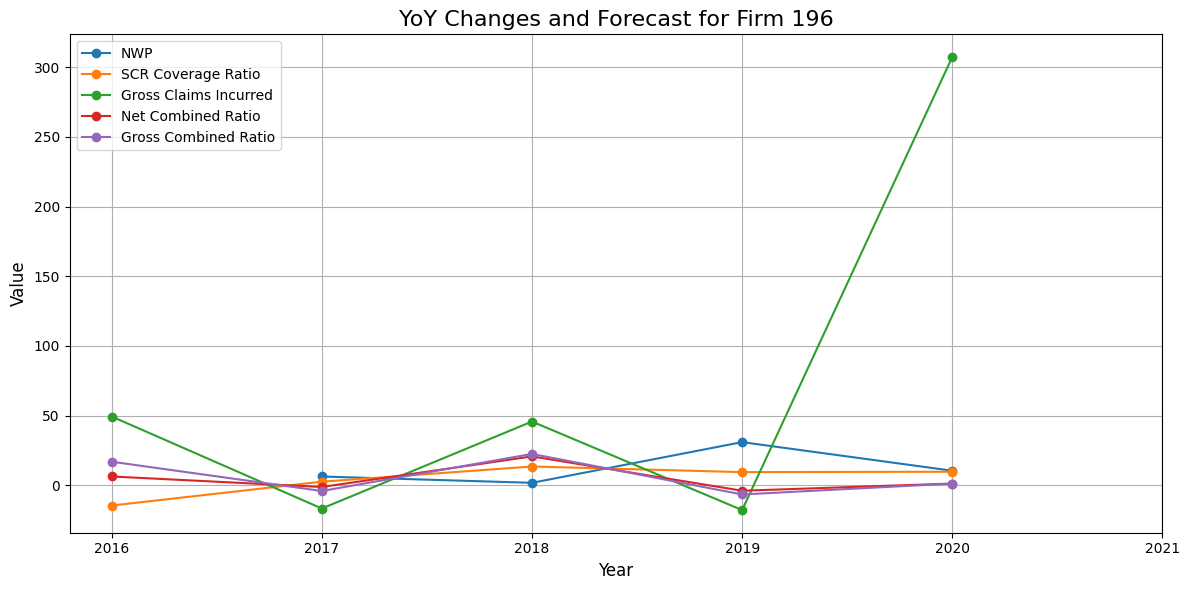

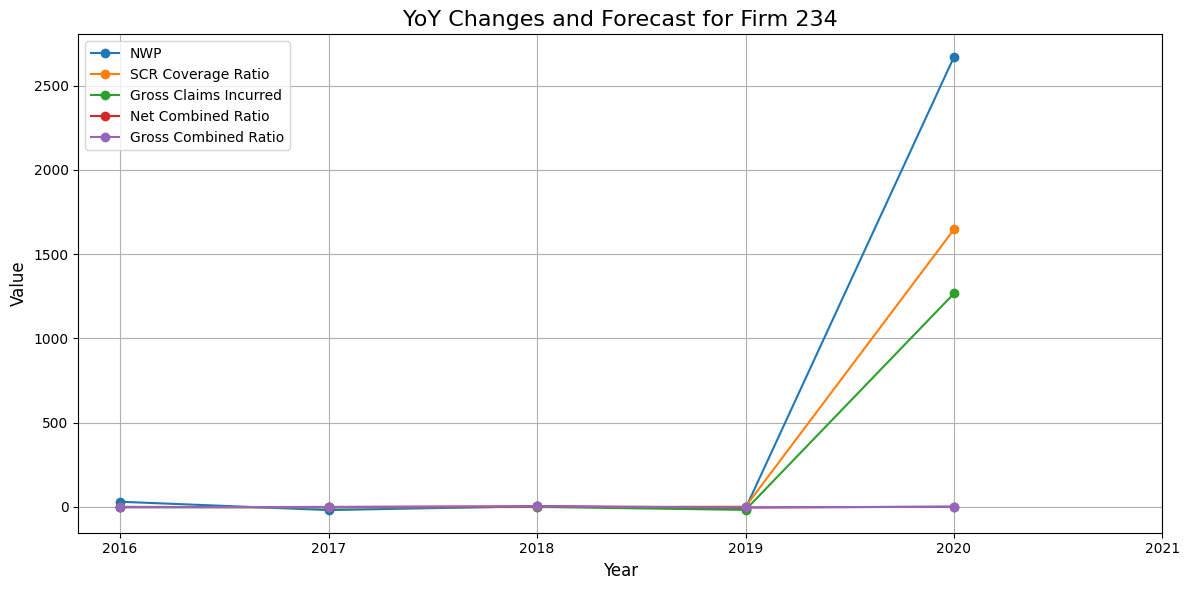

In [ ]:
# Define metrics to plot
metrics = ['NWP', 'SCR Coverage Ratio', 'Gross Claims Incurred', 'Net Combined Ratio', 'Gross Combined Ratio']

# Loop over each firm in the final list of firms
for firm in final_firms:
    plt.figure(figsize=(12, 6))

    # Loop over each metric and create a plot
    for metric in metrics:
        # YoY columns for this metric
        yoy_columns = [f"{metric}_YoY_{year1}_{year2}" for year1, year2 in zip(range(2016, 2020), range(2017, 2021))]

        # Get the YoY change data for the firm
        yoy_data = df_with_yoy_changes[df_with_yoy_changes['Firm'] == firm][yoy_columns].values.flatten()

        # Get the forecast data for 2021 for the firm and the metric
        forecast_data = forecasted_data_final_firms[forecasted_data_final_firms['Firm'] == firm][f"Forecast_{metric}_2021"].values

        # Combine YoY data and forecast data
        all_years_data = list(yoy_data) + list(forecast_data)

        # Handle missing data (ensure we have 6 data points for years 2016-2021)
        if len(all_years_data) < 6:
            all_years_data.extend([np.nan] * (6 - len(all_years_data)))

        # Plot YoY data (2016-2020) and forecast data (2021)
        plt.plot(range(2016, 2022), all_years_data, marker='o', label=f'{metric}')

    # Add titles and labels
    plt.title(f'YoY Changes and Forecast for {firm}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(range(2016, 2022))
    plt.legend(loc='upper left')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


Additionally, the inclusion of forecasted values for 2021 highlights potential future trends in firm performance. These forecasted metrics — NWP, SCR Coverage Ratio, Gross Claims Incurred, and Combined Ratios — provide an early warning of firms that might face increased financial stress, operational challenges, or risks in the near future. The forecasts reinforce our decision-making process regarding which firms require strategic resource allocation and closer supervision.

Key Findings:
1. Firms with High Forecasted NWP:

Firms with a high forecasted NWP for 2021 are expected to handle significant premium inflows. While this can indicate strong growth potential, it may also strain resources, especially for firms that have low SCR Coverage or high combined ratios.
 *  Firm 210: Forecasted NWP of 39,293.57 with SCR Coverage of 494.41 indicates a large premium intake but potential solvency pressure.
 * Firm 199: Forecasted NWP of 10,773.05 with SCR Coverage of 3,413.94 suggests resource pressure to ensure solvency stability.

2. Firms with Low SCR Coverage Ratios:

Firms with low forecasted SCR Coverage Ratios are at risk of insolvency, signaling that they may struggle to meet their capital requirements in the near future.

 * Firm 17: Forecasted SCR Coverage of -32.94 and Gross Claims Incurred of 2,475.33, representing significant risk of capital deficiency and rising claims liabilities.
* Firm 25: Forecasted SCR Coverage of 3.79 with declining gross claims incurred of -591.63 highlights financial imbalance and risk.

3. Firms with High Forecasted Gross Claims Incurred:

High gross claims forecasts indicate potential financial strain due to increased liabilities. These firms may require focused resource allocation to manage potential claim payouts.

*  Firm 280: Forecasted Gross Claims Incurred of 1,034.70, indicating significant financial exposure in 2021.
* Firm 304: Forecasted Gross Claims Incurred of 1,832.11 coupled with an SCR Coverage of 11.82 indicates rising liabilities, warranting close supervision.

4. Firms with High Combined Ratios (Net and Gross):

Firms with high forecasted combined ratios are likely to struggle with profitability, as high ratios indicate that firms are paying out more in claims and expenses than they are earning in premiums.

* Firm 49: Forecasted Net Combined Ratio of 1.52 and Gross Combined Ratio of 1.28 indicates profitability challenges and financial pressure.
* Firm 165: Forecasted Net Combined Ratio of 1.39 and Gross Combined Ratio of 1.27 shows difficulty in maintaining profitability amidst rising costs.

Final List of Firms Requiring Resource Supervision:

Based on the intersection of size, significant year-on-year changes, identified outliers, high-risk factors, and forecasted data, the following firms have been identified as requiring resource supervision in 2021:

* Firm 5: Forecasted NWP of 120.54, SCR of 76.69, and Gross Claims Incurred of 529.40.
*     Firm 6: Forecasted NWP of 3,321.30, SCR of 3,504.46, and Gross Claims Incurred of 97.96.
*     Firm 17: Forecasted NWP of -722.60, SCR of -32.94, and Gross Claims Incurred of 2,475.33.
*   Firm 22: Forecasted NWP of 19.42, SCR of 86.90, and Gross Claims Incurred of 1,351.94.
*     Firm 25: Forecasted NWP of 4,457.95, SCR of 3.79, and Gross Claims Incurred of -591.63.
*    Firm 49: Forecasted NWP of 4.23, SCR of 4.11, and Gross Claims Incurred of 616.20.
*     Firm 52: Forecasted NWP of 13.08, SCR of 7.99, and Gross Claims Incurred of 1,966.98.
*     Firm 74: Forecasted NWP of 235.28, SCR of 243.97, and Gross Claims Incurred of 1,584.37.
*     Firm 81: Forecasted NWP of 0.07, SCR of 1.23, and Gross Claims Incurred of 501.43.
*     Firm 105: Forecasted NWP of 2,974.58, SCR of 8,818.31, and Gross Claims Incurred of 2,080.13.
*     Firm 158: Forecasted NWP of 368.95, SCR of 241.43, and Gross Claims Incurred of 1,253.18.
*     Firm 163: Forecasted NWP of 0.03, SCR of -0.34, and Gross Claims Incurred of -49.39.
*    Firm 165: Forecasted NWP of 347.45, SCR of 147.90, and Gross Claims Incurred of 1,082.42.
*     Firm 183: Forecasted NWP of 0.00, SCR of 56.17, and Gross Claims Incurred of 84.98.
*     Firm 196: Forecasted NWP of 10.46, SCR of 9.74, and Gross Claims Incurred of 307.33.
*     Firm 199: Forecasted NWP of 10,773.05, SCR of 3,413.94, and Gross Claims Incurred of 267.49.
*     Firm 210: Forecasted NWP of 39,293.57, SCR of 494.41, and Gross Claims Incurred of 557.04.
*     Firm 234: Forecasted NWP of 2,670.29, SCR of 1,647.09, and Gross Claims Incurred of 1,266.45.
*     Firm 243: Forecasted NWP of -21.90, SCR of 36.67, and Gross Claims Incurred of 82.99.
*     Firm 272: Forecasted NWP of -276.43, SCR of 300.59, and Gross Claims Incurred of 661.03.
*     Firm 275: Forecasted NWP of 216.31, SCR of 172.70, and Gross Claims Incurred of 77.02.
*    Firm 280: Forecasted NWP of 100.63, SCR of 146.49, and Gross Claims Incurred of 1,034.70.
*    Firm 283: Forecasted NWP of 16.34, SCR of 83.26, and Gross Claims Incurred of 1,494.83.
*     Firm 286: Forecasted NWP of 351.84, SCR of 251.76, and Gross Claims Incurred of 1,519.45.
*     Firm 297: Forecasted NWP of 13.71, SCR of 10.35, and Gross Claims Incurred of 921.20.
*    Firm 304: Forecasted NWP of 18.77, SCR of 11.82, and Gross Claims Incurred of 1,832.11.
*    Firm 305: Forecasted NWP of 1,398.44, SCR of 43.68, and Gross Claims Incurred of 415.13.

Recommendations:

To mitigate future risks and ensure financial stability, we recommend allocating additional resources for monitoring and supporting these firms. Enhanced supervision, contingency planning, and proactive engagement will be necessary to address forecasted challenges and maintain operational health.
